Flatiron School 2021-2022

Student: Maria Antonietta Ricci

Tutor: Jeff

Final Project Phase 1

This project analyzes data from BOM and IMDB databases in the timespan 2010-2018.

Business Problem:
what types of films are currently doing the best at the box office.

Hypothesis:
How do we measure what people like?
- Box office gain 
- Average Ratings
- Votes Numbers

- if people like a movie, they will be more inclined to spend money to go the cinema 
- if people like a movie, they will leave a good rating
- if people like a movie, more of them will be inclined to vote it 

Questions:
- What are the most gaining movies?
- What are the movies with the highest average ratings?
- What are the most voted movies?
- How many movies per genres were produced aka what are the most common genres?
- To which genres belong to the most voted movies?
- To which genres belong to the highest rated movies?
- To which genres belong to the most gaining movies?
- What are the relationship between the most gaining movies and their votes number?
- What are the relationship between the most gaining movies and their average ratings?

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#BOM DATA LOADING
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz',compression='infer', header=0, sep=',', quotechar='"')
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#DATA CLEANING
#Columns info:names
#Missing values: Null values are represented by NaN 
#Trends:Missing values for domestic gross and foreign gross 
#Features:Titles, gross, no genres specified, years
bom_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
bom_movies.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
#Cleaning and tidying the tables
bom_movies.rename(columns = {"title":"Primary Title", "studio":"Production Studio", "domestic_gross":"Domestic Gross", "foreign_gross":"Foreign Gross", "year":"Year"}, inplace = True)
bom_movies

,Primary Title,Production Studio,Domestic Gross,Foreign Gross,Year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
#Dealing with Missing values
bom_movies.isna().sum()

Primary Title           0
Production Studio       5
Domestic Gross         28
Foreign Gross        1350
Year                    0
dtype: int64

In [7]:
#Categorical missing values replaced with "Unknown"
bom_movies["Production Studio"].fillna('Unknown',inplace=True)
bom_movies

,Primary Title,Production Studio,Domestic Gross,Foreign Gross,Year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [8]:
#In order to perform maths and stats operations, 
#it is necessary that the columns "Domestic Gross" and "Foreign Gross" to be filled with numerical data.

In [9]:
#Modification of strings due to an error I keep getting
bom_movies["Foreign Gross"] = bom_movies["Foreign Gross"].str.replace(",", "")
bom_movies["Foreign Gross"] = pd.to_numeric(bom_movies["Foreign Gross"])
bom_movies

,Primary Title,Production Studio,Domestic Gross,Foreign Gross,Year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [10]:
# Giving the nature of the study and the business problem, I decided to drop the NaN values
bom_movies.dropna(inplace = True)

EXPLORATORY DATA ANALYSIS

In [11]:
bom_movies

,Primary Title,Production Studio,Domestic Gross,Foreign Gross,Year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [12]:
#How many movies per year according to BOM
bom_tl_counts = bom_movies.groupby(["Year"])["Primary Title"].nunique()
bom_tl_counts

Year
2010    309
2011    291
2012    243
2013    200
2014    234
2015    190
2016    192
2017    177
2018    173
Name: Primary Title, dtype: int64

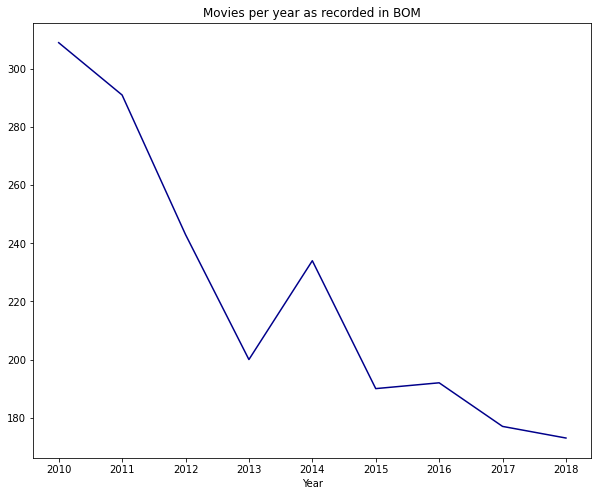

In [13]:
bom_tl_counts.plot.line(title = 'Movies per year as recorded in BOM',color='DarkBlue',figsize=(10, 8));

Drammatical decrease in movies productions that reached the first low in 2013. 
After a restart in 2014 the trend kept fallin hitting a new low in 2018.

In [14]:
#Separating Domestic vs Foreing markets
#Differences important indicator of preferences and localization needs.

In [15]:
############DOMESTIC#############

In [16]:
#The columns "Domestic Gross" and "Foreign Gross", they give different results and can highlight patterns 
#specific for each market, internal (USA) and external(Rest of the world), geographical criterium.
bom_movies_dg = bom_movies[["Primary Title", "Production Studio", "Domestic Gross", "Year"]]
bom_movies_dg.set_index("Primary Title", inplace = True)

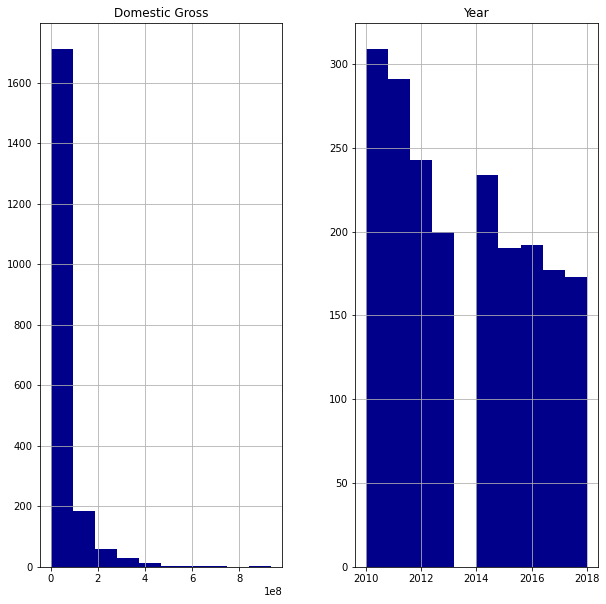

In [17]:
# How variables are skewed for the Domestic Market
bom_movies_dg.hist(color='DarkBlue',figsize= (10,10));


All variables are skewed. Positive skewness.

In [18]:
bom_movies_dg.describe()

,Domestic Gross,Year
count,2.009000e+03,2009.000000
mean,4.697311e+07,2013.503235
std,8.159966e+07,2.598481
min,4.000000e+02,2010.000000
25%,6.650000e+05,2011.000000
50%,1.650000e+07,2013.000000
75%,5.600000e+07,2016.000000
max,9.367000e+08,2018.000000


In [19]:
bom = bom_movies_dg.sort_values(["Year","Domestic Gross"], ascending = False)
bom

,Production Studio,Domestic Gross,Year
Primary Title,,,
Black Panther,BV,700100000.0,2018
Avengers: Infinity War,BV,678800000.0,2018
Incredibles 2,BV,608600000.0,2018
Jurassic World: Fallen Kingdom,Uni.,417700000.0,2018
Aquaman,WB,335100000.0,2018
...,...,...,...
Inhale,IFC,4100.0,2010
Boogie Woogie,IFC,2600.0,2010
The Girl (Flickan),Olive,2200.0,2010


In [20]:
#These are the movies that gained the most in given time span for Domestic Market
bom_titles = bom.groupby("Year")["Domestic Gross"].nlargest(10).reset_index()
bom_titles.sort_values(by=["Year", "Domestic Gross"], ascending = False)

,Year,Primary Title,Domestic Gross
80,2018,Black Panther,700100000.0
81,2018,Avengers: Infinity War,678800000.0
82,2018,Incredibles 2,608600000.0
83,2018,Jurassic World: Fallen Kingdom,417700000.0
84,2018,Aquaman,335100000.0
...,...,...,...
5,2010,Inception,292600000.0
6,2010,Despicable Me,251500000.0
7,2010,Shrek Forever After,238700000.0
8,2010,How to Train Your Dragon,217600000.0


In [21]:
titles_dom_pivot = pd.pivot_table(bom_titles, values=["Domestic Gross"], index =["Primary Title"], columns=["Year"])

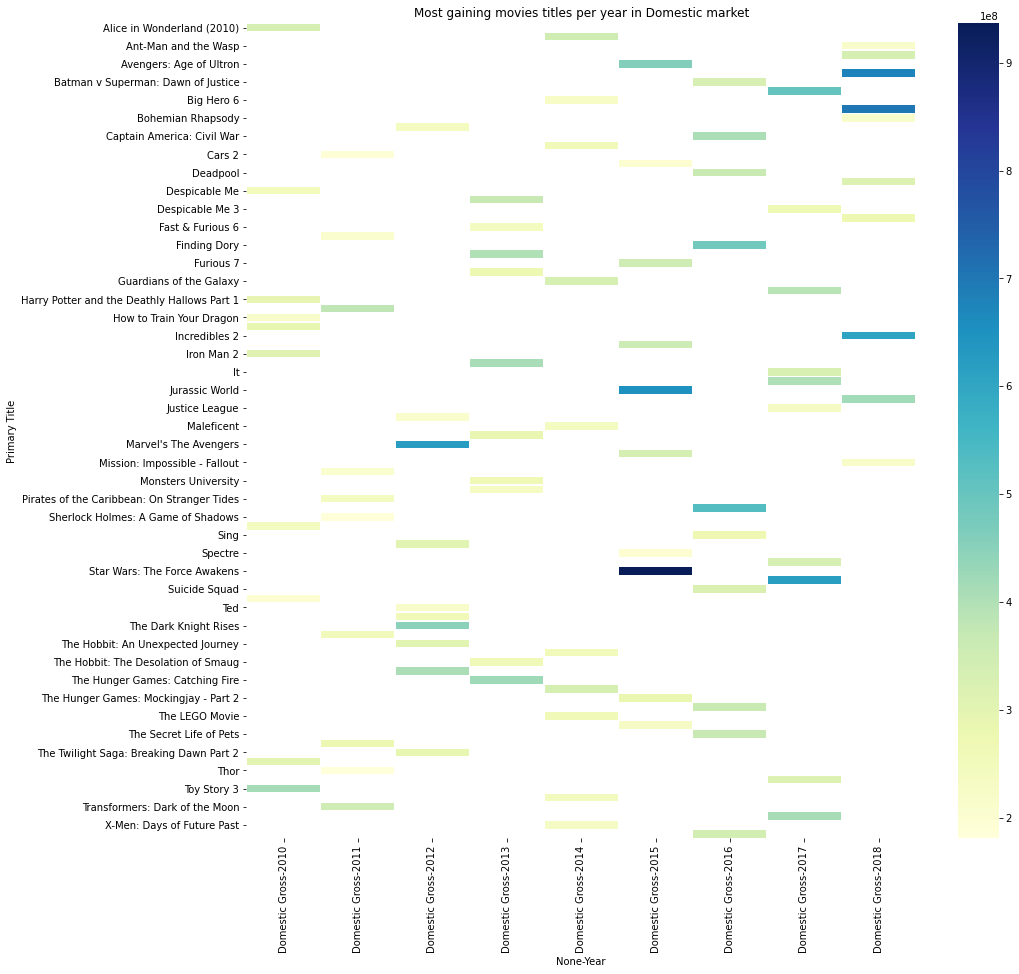

In [22]:
#Most gaining title per year
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_title('Most gaining movies titles per year in Domestic market')
sns.heatmap(titles_dom_pivot, linewidths=.5, cmap='YlGnBu');

In [23]:
########FOREIGN########

In [24]:
bom_movies_fg = bom_movies[["Primary Title", "Production Studio", "Foreign Gross", "Year"]]
bom_movies_fg.reset_index()
bom_movies_fg.set_index("Primary Title")

,Production Studio,Foreign Gross,Year
Primary Title,,,
Toy Story 3,BV,652000000.0,2010
Alice in Wonderland (2010),BV,691300000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,664300000.0,2010
Inception,WB,535700000.0,2010
Shrek Forever After,P/DW,513900000.0,2010
...,...,...,...
I Still See You,LGF,1500000.0,2018
The Catcher Was a Spy,IFC,229000.0,2018
Time Freak,Grindstone,256000.0,2018


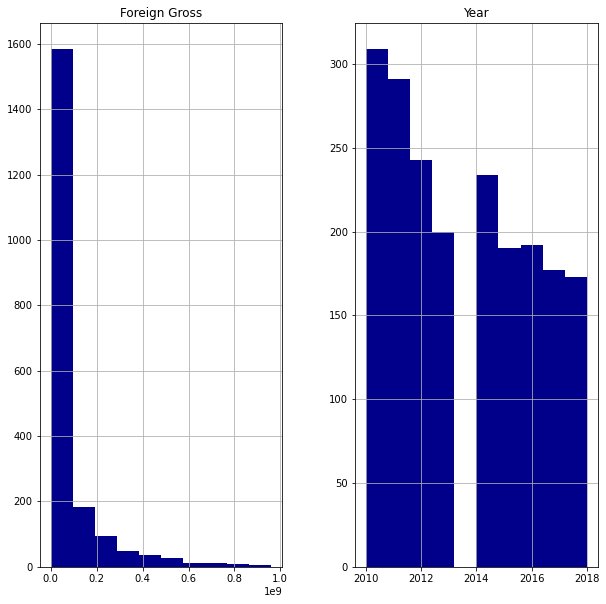

In [25]:
# How variables are skewed For Foreing Market
bom_movies_fg.hist(color='DarkBlue',figsize= (10,10));

All variables are skewed. Positive skewness.

In [26]:
bom_for= bom_movies_fg.sort_values(["Year","Foreign Gross"], ascending = False)
bom_for

,Primary Title,Production Studio,Foreign Gross,Year
3081,Jurassic World: Fallen Kingdom,Uni.,891800000.0,2018
3083,Aquaman,WB,812700000.0,2018
3084,Bohemian Rhapsody,Fox,687200000.0,2018
3080,Black Panther,BV,646900000.0,2018
3085,Venom (2018),Sony,641500000.0,2018
...,...,...,...,...
317,Bluebeard,Strand,5200.0,2010
266,The Extra Man,Magn.,4500.0,2010
304,Waking Sleeping Beauty,BV,4200.0,2010
290,Client 9: The Rise and Fall of Eliot Spitzer,Magn.,3500.0,2010


In [27]:
bom_movies_fg.describe()

,Foreign Gross,Year
count,2.009000e+03,2009.000000
mean,7.571822e+07,2013.503235
std,1.381296e+08,2.598481
min,6.000000e+02,2010.000000
25%,3.900000e+06,2011.000000
50%,1.930000e+07,2013.000000
75%,7.590000e+07,2016.000000
max,9.605000e+08,2018.000000


In [28]:
#Most gaining movies in time span in Foreign Market
bom_for_titles = bom_for.set_index("Primary Title").groupby(["Year"])["Foreign Gross"].nlargest(10).reset_index()
bom_for_titles.sort_values(by =["Year", "Foreign Gross"], ascending = False)

,Year,Primary Title,Foreign Gross
80,2018,Jurassic World: Fallen Kingdom,891800000.0
81,2018,Aquaman,812700000.0
82,2018,Bohemian Rhapsody,687200000.0
83,2018,Black Panther,646900000.0
84,2018,Venom (2018),641500000.0
...,...,...,...
5,2010,The Twilight Saga: Eclipse,398000000.0
6,2010,Tangled,391000000.0
7,2010,Clash of the Titans (2010),330000000.0
8,2010,Iron Man 2,311500000.0


In [29]:
titles_for_pivot = pd.pivot_table(bom_for_titles, values=["Foreign Gross"], index =["Primary Title"], columns=["Year"])
titles_for_pivot

Foreign Gross                              \
Year                                        2010 2011 2012 2013         2014   
Primary Title                                                                  
Alice in Wonderland (2010)           691300000.0  NaN  NaN  NaN          NaN   
Aquaman                                      NaN  NaN  NaN  NaN          NaN   
Avengers: Age of Ultron                      NaN  NaN  NaN  NaN          NaN   
Batman v Superman: Dawn of Justice           NaN  NaN  NaN  NaN          NaN   
Beauty and the Beast (2017)                  NaN  NaN  NaN  NaN          NaN   
...                                          ...  ...  ...  ...          ...   
Transformers: The Last Knight                NaN  NaN  NaN  NaN          NaN   
Venom (2018)                                 NaN  NaN  NaN  NaN          NaN   
Wolf Warrior 2                               NaN  NaN  NaN  NaN          NaN   
X-Men: Days of Future Past                   NaN  NaN  NaN  NaN  513900000.0   
Zootopia                                     NaN  NaN  NaN  NaN          NaN   

                                                                           \
Year                                       2015         2016         2017   
Primary Title                                                               
Alice in Wonderland (2010)                  NaN          NaN          NaN   
Aquaman                                     NaN          NaN          NaN   
Avengers: Age of Ultron             946400000.0          NaN          NaN   
Batman v Superman: Dawn of Justice          NaN  543300000.0          NaN   
Beauty and the Beast (2017)                 NaN          NaN  759500000.0   
...                                         ...          ...          ...   
Transformers: The Last Knight               NaN          NaN  475300000.0   
Venom (2018)                                NaN          NaN          NaN   
Wolf Warrior 2                              NaN          NaN  867600000.0   
X-Men: Days of Future Past                  NaN          NaN          NaN   
Zootopia                                    NaN  682500000.0          NaN   

                                                 
Year                                       2018  
Primary Title                                    
Alice in Wonderland (2010)                  NaN  
Aquaman                             812700000.0  
Avengers: Age of Ultron                     NaN  
Batman v Superman: Dawn of Justice          NaN  
Beauty and the Beast (2017)                 NaN  
...                                         ...  
Transformers: The Last Knight               NaN  
Venom (2018)                        641500000.0  
Wolf Warrior 2                              NaN  
X-Men: Days of Future Past                  NaN  
Zootopia                                    NaN  

[90 rows x 9 columns]

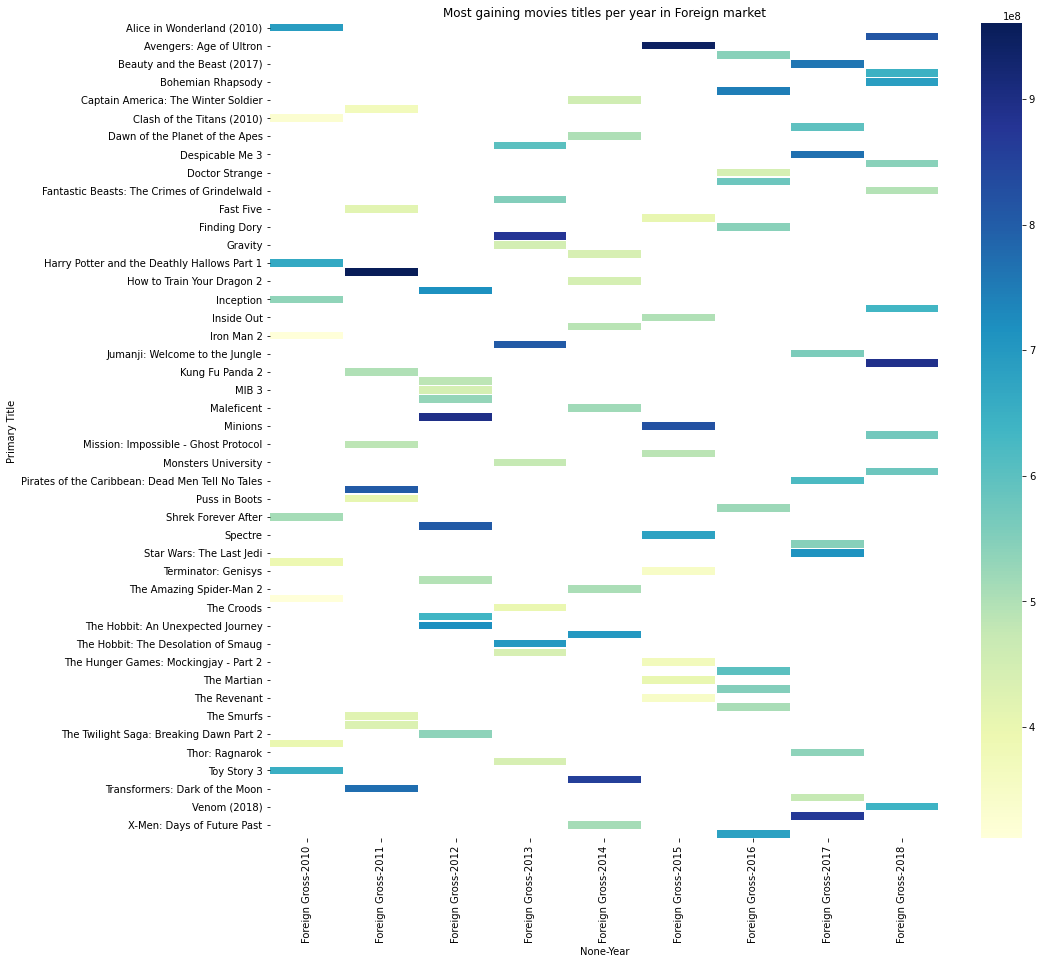

In [30]:
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_title('Most gaining movies titles per year in Foreign market')
sns.heatmap(titles_for_pivot, linewidths=.5, cmap='YlGnBu');

In [31]:
####IMDB

In [32]:
#DATA LOADING 

In [33]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz',compression='gzip', encoding='utf-8', header=0, sep=',', quotechar='"')

In [34]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [35]:
# DATA CLEANING
#Columns info:names
#Missing values: Null values are represented by NaN 
#Trends:Missing Values both numerical and categorical 
#Features: Multiple genres per movie in several cases
imdb_title_basics.columns
imdb_title_basics.isna()
imdb_title_basics.isna().sum()
imdb_title_basics.info()
imdb_title_basics.index
imdb_title_basics.reset_index
imdb_title_basics.set_index("tconst")
imdb_title_basics["tconst"].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


tt4862474    1
tt5269818    1
tt5339432    1
tt3855730    1
tt3696436    1
            ..
tt6371934    1
tt7822496    1
tt1841520    1
tt7525514    1
tt2113739    1
Name: tconst, Length: 146144, dtype: int64

In [36]:
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz',compression='gzip', encoding='utf-8', header=0, sep=',', quotechar='"')
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [37]:
#Columns info: names 
#Missing values: Null values are represented by NaN 
#Trends:
#Features:No titles, avg rating and num of votes

imdb_title_ratings.columns
imdb_title_ratings.isna()
imdb_title_ratings.isna().sum()
imdb_title_ratings.index
imdb_title_ratings.reset_index
imdb_title_ratings.set_index("tconst")
imdb_title_ratings["tconst"].value_counts()
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [38]:
#Let's start with joying the two tables based on the matching values, key tconst
imdb_details_reviews = pd.merge(imdb_title_basics, imdb_title_ratings, on = "tconst")
imdb_details_reviews

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [39]:
imdb_details_reviews.duplicated(subset= "tconst", keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

In [40]:
imdb_details_reviews.drop_duplicates(subset = "tconst", keep= False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [41]:
imdb_details_reviews.isna()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
73851,False,False,False,False,False,False,False,False
73852,False,False,False,False,False,False,False,False
73853,False,False,False,False,True,False,False,False
73854,False,False,False,False,True,True,False,False


In [42]:
imdb_details_reviews.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [43]:
#Runtime_minutes and genres have missing values.
#I decided to drop runtime as 
#I think if a customer is really interested in the content 
#the length of it won't be a determining factor in the choice
imdb_details_reviews.rename(columns={"primary_title":"Primary Title","original_title":"Original Title",'start_year': 'Year', "genres":"Genres", "averagerating": "Average Rating", "numvotes":"Votes Number"}, inplace=True)
imdb_details_reviews

,tconst,Primary Title,Original Title,Year,runtime_minutes,Genres,Average Rating,Votes Number
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [44]:
imdb_details_reviews["Genres"].fillna("Unknown", inplace = True)
imdb_details_reviews
imdb_details_reviews.reset_index()
imdb_details_reviews = imdb_details_reviews.drop(["runtime_minutes", "Original Title", "tconst"], axis=1)

In [45]:
imdb_details_reviews

,Primary Title,Year,Genres,Average Rating,Votes Number
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,Unknown,6.6,5


In [46]:
imdb2 = imdb_details_reviews.copy()
imdb2

,Primary Title,Year,Genres,Average Rating,Votes Number
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,Unknown,6.6,5


In [47]:
imdb_details_reviews.describe()

,Year,Average Rating,Votes Number
count,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,6.332729,3.523662e+03
std,2.614807,1.474978,3.029402e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.500000,1.400000e+01
50%,2014.000000,6.500000,4.900000e+01
75%,2016.000000,7.400000,2.820000e+02
max,2019.000000,10.000000,1.841066e+06


In [48]:
#Movies produced in time span according to IMDB
imdb_tl_counts = imdb_details_reviews.groupby(["Year"])["Primary Title"].nunique()
imdb_tl_counts

Year
2010    6744
2011    7341
2012    7614
2013    7932
2014    8312
2015    8406
2016    8648
2017    8638
2018    7462
2019    2174
Name: Primary Title, dtype: int64

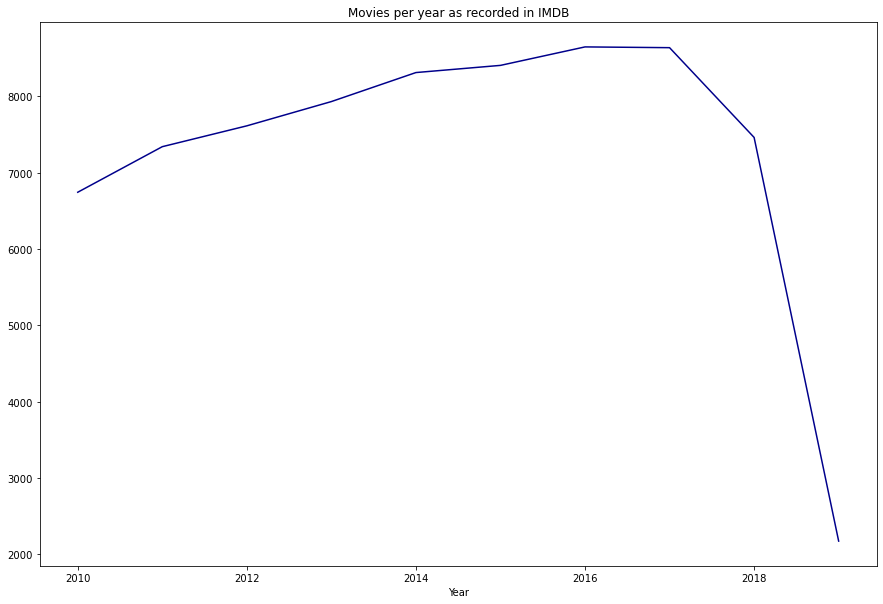

In [49]:
imdb_tl_counts.plot.line(title = 'Movies per year as recorded in IMDB',color='DarkBlue',figsize=(15, 10));

It doesn't reflect the situation seen above.
It seems there was a steady growith which reached its peak in 2015. The trend started falling in 2017.

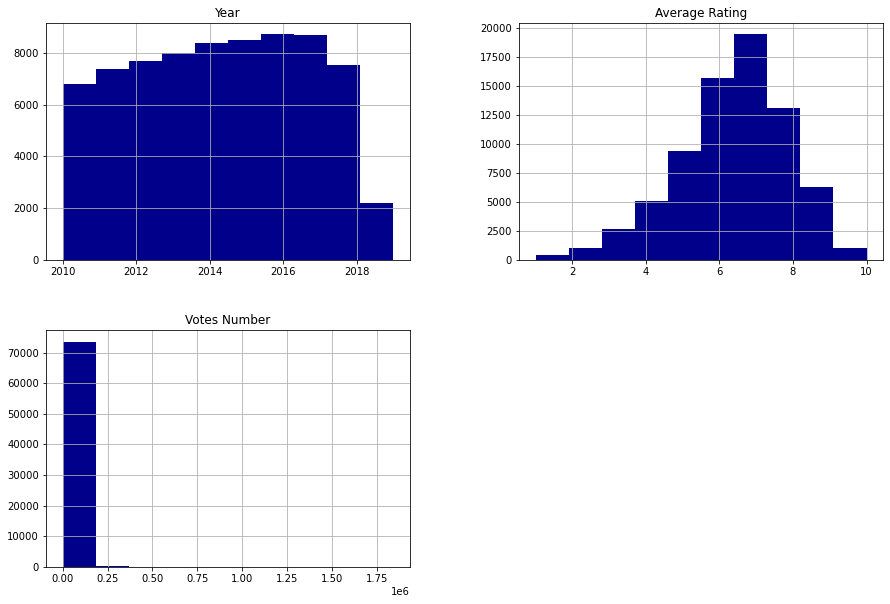

In [50]:
# How variables are skewed in IMDB
imdb_details_reviews.hist(color='DarkBlue',figsize= (15,10));

While the variables for Year and Average Rating have almost a normal skew, the variable Votes Number is right skewed.

In [51]:
imdb_details_reviews

,Primary Title,Year,Genres,Average Rating,Votes Number
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,Unknown,6.6,5


In [52]:
### How many movies per genres were produced aka what are the most common genres?

In [53]:
cm_prod = imdb_details_reviews["Genres"].str.split(",").apply(pd.Series, 1).stack()
cm_prod.index = cm_prod.index.droplevel(-1)
cm_prod.name = "Genres"
del imdb_details_reviews["Genres"]
cm_split = imdb_details_reviews.join(cm_prod)
cm_split

,Primary Title,Year,Average Rating,Votes Number,Genres
0,Sunghursh,2013,7.0,77,Action
0,Sunghursh,2013,7.0,77,Crime
0,Sunghursh,2013,7.0,77,Drama
1,One Day Before the Rainy Season,2019,7.2,43,Biography
1,One Day Before the Rainy Season,2019,7.2,43,Drama
...,...,...,...,...,...
73852,Sokagin Çocuklari,2019,8.7,136,Drama
73852,Sokagin Çocuklari,2019,8.7,136,Family
73853,Albatross,2017,8.5,8,Documentary
73854,La vida sense la Sara Amat,2019,6.6,5,Unknown


In [54]:
genre_counts = cm_split.groupby(["Year", "Genres"])["Primary Title"].nunique().reset_index()
genre_counts

,Year,Genres,Primary Title
0,2010,Action,691
1,2010,Adventure,313
2,2010,Animation,150
3,2010,Biography,341
4,2010,Comedy,1606
...,...,...,...
239,2019,Sport,31
240,2019,Thriller,260
241,2019,Unknown,11
242,2019,War,25


In [55]:
genres_year_pivot = pd.pivot_table(genre_counts, values=["Primary Title"], index =["Genres"], columns=["Year"])
genres_year_pivot

Primary Title                                                  \
Year                 2010    2011    2012    2013    2014    2015    2016   
Genres                                                                      
Action              691.0   692.0   689.0   713.0   772.0   804.0   857.0   
Adult                 NaN     NaN     1.0     NaN     NaN     1.0     1.0   
Adventure           313.0   369.0   371.0   464.0   453.0   462.0   467.0   
Animation           150.0   199.0   167.0   169.0   191.0   196.0   196.0   
Biography           341.0   382.0   396.0   521.0   603.0   499.0   401.0   
Comedy             1606.0  1755.0  1823.0  1894.0  1981.0  1946.0  2008.0   
Crime               424.0   466.0   473.0   506.0   524.0   535.0   591.0   
Documentary        1644.0  1852.0  1940.0  2024.0  2153.0  2103.0  2090.0   
Drama              2883.0  3076.0  3153.0  3481.0  3509.0  3599.0  3499.0   
Family              299.0   313.0   364.0   469.0   466.0   415.0   353.0   
Fantasy             187.0   216.0   210.0   221.0   240.0   257.0   275.0   
Game-Show             NaN     NaN     NaN     1.0     NaN     NaN     NaN   
History             274.0   277.0   352.0   377.0   427.0   352.0   277.0   
Horror              646.0   699.0   825.0   804.0   898.0   879.0   949.0   
Music               193.0   230.0   249.0   224.0   272.0   238.0   173.0   
Musical              82.0    81.0    80.0    82.0    77.0    70.0    87.0   
Mystery             239.0   275.0   290.0   322.0   364.0   373.0   396.0   
News                 62.0    71.0    86.0   104.0   127.0    90.0    22.0   
Reality-TV            3.0     NaN     1.0     3.0     1.0     4.0     2.0   
Romance             641.0   635.0   652.0   773.0   841.0   797.0   765.0   
Sci-Fi              196.0   200.0   208.0   259.0   252.0   269.0   251.0   
Short                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Sport                93.0   124.0   104.0   142.0   156.0   141.0   148.0   
Thriller            669.0   709.0   795.0   929.0   973.0  1015.0  1023.0   
Unknown              91.0   115.0    78.0    85.0   102.0    89.0   108.0   
War                  90.0    99.0    82.0    71.0   108.0   103.0    95.0   
Western              25.0    30.0    31.0    27.0    39.0    28.0    24.0   

                                    
Year           2017    2018   2019  
Genres                              
Action        852.0   698.0  204.0  
Adult           NaN     NaN    NaN  
Adventure     434.0   373.0  107.0  
Animation     210.0   204.0   61.0  
Biography     334.0   249.0   83.0  
Comedy       1909.0  1784.0  553.0  
Crime         532.0   431.0  125.0  
Documentary  2014.0  1511.0  400.0  
Drama        3455.0  3039.0  899.0  
Family        349.0   299.0   83.0  
Fantasy       244.0   214.0   61.0  
Game-Show       1.0     NaN    NaN  
History       246.0   202.0   40.0  
Horror        957.0   788.0  204.0  
Music         197.0   154.0   37.0  
Musical        75.0    71.0   16.0  
Mystery       395.0   310.0   72.0  
News           10.0     5.0    2.0  
Reality-TV      1.0     2.0    NaN  
Romance       689.0   614.0  168.0  
Sci-Fi        281.0   220.0   65.0  
Short           NaN     1.0    NaN  
Sport         124.0   114.0   31.0  
Thriller      952.0   859.0  260.0  
Unknown        75.0    50.0   11.0  
War            99.0    81.0   25.0  
Western        37.0    33.0    6.0

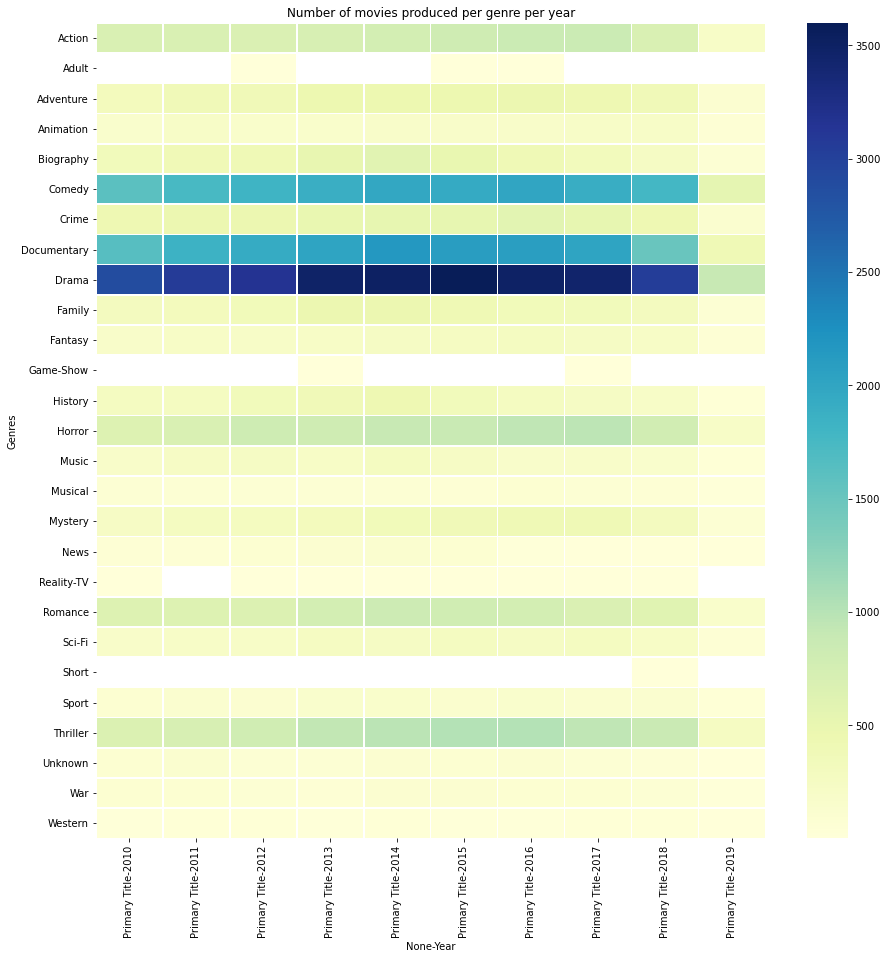

In [56]:
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_title('Number of movies produced per genre per year')
sns.heatmap(genres_year_pivot, linewidths=.5, cmap='YlGnBu');

Most produced movies belong consistently to these genres:
- Drama
- Documentary 
- Comedy

In [57]:
# Most Voted titles in IMDB
vote_titles = imdb_details_reviews.sort_values(by = ["Year", "Votes Number"], ascending = False)
vote_titles

,Primary Title,Year,Average Rating,Votes Number
43420,Avengers: Endgame,2019,8.8,441135
43416,Captain Marvel,2019,7.0,296225
63750,Glass,2019,6.8,133793
108,Shazam!,2019,7.4,109051
63925,Us,2019,7.1,102511
...,...,...,...,...
64266,Collector Gari Bharya,2010,6.2,5
67118,David Bowie: Rare and Unseen,2010,6.0,5
67840,Encountering Burning Man,2010,6.0,5
69672,Goodbye Dolly,2010,6.8,5


In [58]:
# Most voted Genres

In [59]:
vote_genres = cm_split.groupby(["Year", "Genres"])["Votes Number"].mean().reset_index()
vote_genres

,Year,Genres,Votes Number
0,2010,Action,16314.832127
1,2010,Adventure,33954.434505
2,2010,Animation,18722.506667
3,2010,Biography,6665.950147
4,2010,Comedy,5926.648194
...,...,...,...
239,2019,Sport,333.354839
240,2019,Thriller,2314.693487
241,2019,Unknown,12.545455
242,2019,War,1727.280000


In [60]:
votes_genres_pivot = pd.pivot_table(vote_genres, values=["Votes Number"], index =["Genres"], columns=["Year"])
votes_genres_pivot

Votes Number                                            \
Year                 2010          2011          2012          2013   
Genres                                                                
Action       16314.832127  16557.595376  17831.804631  17146.595537   
Adult                 NaN           NaN      8.000000           NaN   
Adventure    33954.434505  23823.487871  26944.361186  22302.346983   
Animation    18722.506667   7956.472362  11207.101796  11860.076923   
Biography     6665.950147   4817.960733   3443.964646   8390.928983   
Comedy        5926.648194   5851.959068   5382.296824   4951.121372   
Crime         8732.584906  10239.351931  10323.006342  14932.388560   
Documentary    360.914842    306.796006    297.329902    280.809077   
Drama         4430.188146   5066.614664   4429.709921   4839.964541   
Family        6732.608696   3846.047771   3673.060440   1143.153191   
Fantasy      17607.601064  18898.143519  16624.347619  15490.701357   
Game-Show             NaN           NaN           NaN      7.000000   
History       3356.817518   1196.375451   2879.883523   2181.198939   
Horror        3745.199690   3395.834049   3128.253930   4524.556790   
Music         2739.611399   1384.126087   2484.686747   2120.209821   
Musical       1155.914634    756.160494   5015.800000   1225.695122   
Mystery      13724.405858  12310.810909   7308.120690  10220.835913   
News           131.822581     61.802817    157.453488    141.269231   
Reality-TV      61.333333           NaN     30.000000     25.333333   
Romance       6566.660436   8025.957614   5579.433384   4468.440568   
Sci-Fi       17487.943878  27187.780000  21842.817308  26462.088462   
Short                 NaN           NaN           NaN           NaN   
Sport         6045.935484   7825.322581   2436.461538   2058.197183   
Thriller      8933.955357   8847.504909   9371.343358   6966.231838   
Unknown         20.120879     16.591304     15.525641     16.752941   
War           3827.688889   2945.080808    979.000000   2815.140845   
Western      13500.880000    499.500000  39854.870968   8147.185185   

                                                                     \
Year                 2014          2015          2016          2017   
Genres                                                                
Action       18601.676585  12750.468401  12541.120047  11039.557377   
Adult                 NaN    128.000000     28.000000           NaN   
Adventure    25224.759912  20572.192641  20598.134904  15105.216092   
Animation     7741.418848   7187.653061  11077.964286   4610.566667   
Biography     4423.764511   6238.649299   5601.059850   5451.485030   
Comedy        4817.497735   3894.274218   3823.077000   2939.995298   
Crime        10229.146947   7375.156134   5367.758037   7084.417293   
Documentary    248.532033    292.467711    235.964678    201.040139   
Drama         4599.832247   3519.806007   3546.929889   3042.261843   
Family        1641.851931   1651.306024   2895.532578   1458.143266   
Fantasy       7910.395833   6832.256809  12836.090909  13314.774590   
Game-Show             NaN           NaN           NaN   3462.000000   
History       1340.219626   2634.105114   5500.722022   4568.455285   
Horror        2714.697442   2179.840678   3233.736621   2874.100937   
Music         4096.544118   2323.386555   4578.462428   1102.329949   
Musical        384.259740    331.757143    477.000000   6109.786667   
Mystery      10907.545205   5654.026738   5821.010101   6589.096203   
News           156.598425    342.322222   1413.409091     16.900000   
Reality-TV       8.000000     26.750000     16.500000      6.000000   
Romance       3687.470309   3208.066333   2594.265280   1744.868116   
Sci-Fi       27953.320158  17339.808118  13167.686508   9687.135231   
Short                 NaN           NaN           NaN           NaN   
Sport         3085.006410   4802.028369   1535.671141    849.040323   
Thriller      6576.390369   4070.518

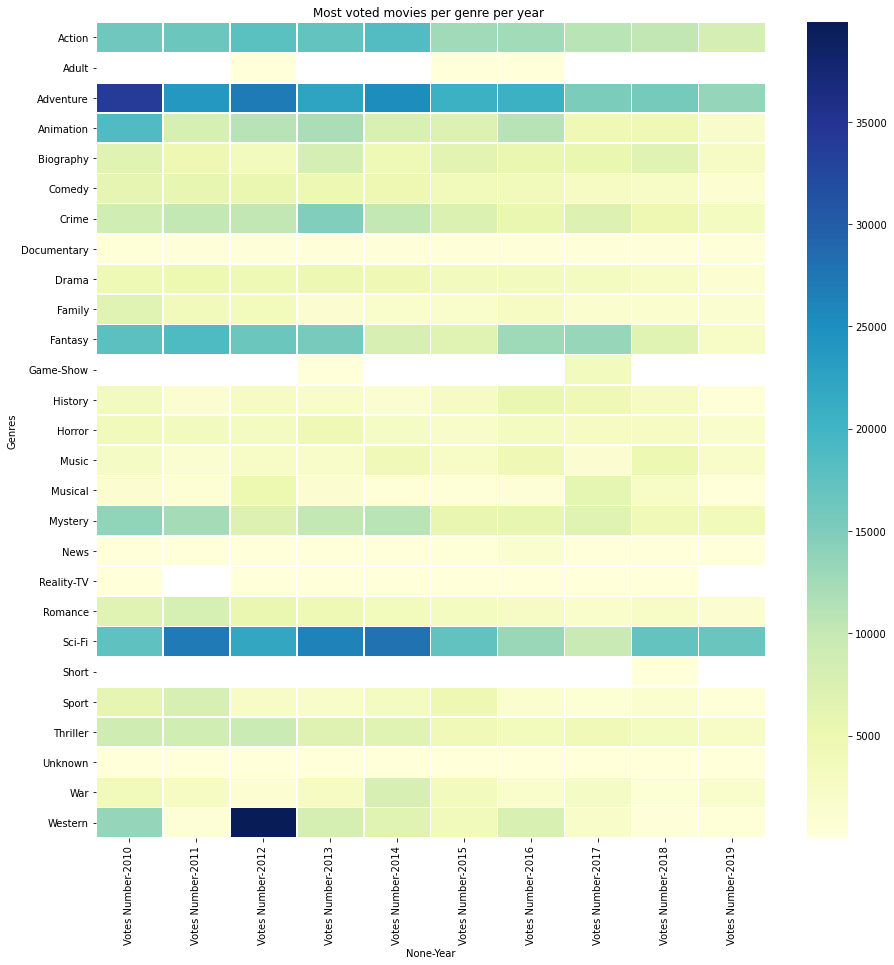

In [61]:
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_title('Most voted movies per genre per year ')
sns.heatmap(votes_genres_pivot, linewidths=.5, cmap='YlGnBu');

Most produced movies belong consistently to these genres:
- Adventure
- Sci fi 
- Action
- Mistery 

In [62]:
#Highest Average Ratings Titles in IMDB

In [63]:
ratings_titles = imdb_details_reviews.sort_values(by = ["Year", "Average Rating"], ascending = False)
ratings_titles

,Primary Title,Year,Average Rating,Votes Number
51109,Fly High: Story of the Disc Dog,2019,10.0,7
53408,All Around Us,2019,10.0,6
65944,Calamity Kevin,2019,10.0,6
71577,Pick It Up! - Ska in the '90s,2019,10.0,5
73616,Renegade,2019,10.0,20
...,...,...,...,...
68482,Dancing Without You,2010,1.1,67
5505,Hito no sabaku,2010,1.0,449
17282,Good Morning to the World!!,2010,1.0,429
33473,One Night: Choice of Evil,2010,1.0,440


In [64]:
#Highest Average Rating Genres in IMDB

In [65]:
ratings_genres = cm_split.groupby(["Year", "Genres"])["Average Rating"].mean().reset_index()
ratings_genres

,Year,Genres,Average Rating
0,2010,Action,5.692330
1,2010,Adventure,6.202556
2,2010,Animation,6.389333
3,2010,Biography,7.117889
4,2010,Comedy,5.959215
...,...,...,...
239,2019,Sport,7.080645
240,2019,Thriller,6.173946
241,2019,Unknown,6.772727
242,2019,War,6.460000


In [66]:
ratings_genres_pivot = pd.pivot_table(ratings_genres, values=["Average Rating"], index =["Genres"], columns=["Year"])
ratings_genres_pivot

Average Rating                                                    \
Year                  2010      2011      2012      2013      2014      2015   
Genres                                                                         
Action            5.692330  5.731503  5.880897  5.707252  5.868435  5.728377   
Adult                  NaN       NaN  5.900000       NaN       NaN  2.000000   
Adventure         6.202556  6.185984  6.308625  6.185345  6.266520  6.105628   
Animation         6.389333  6.163819  6.144910  6.272781  6.364921  6.184184   
Biography         7.117889  7.195550  7.236111  7.122841  7.251575  7.188978   
Comedy            5.959215  5.927004  5.977601  6.023272  5.972320  5.924193   
Crime             5.953302  6.044206  6.126216  6.170414  6.196756  6.086059   
Documentary       7.299270  7.295845  7.247041  7.237395  7.324373  7.338889   
Drama             6.279256  6.320640  6.377732  6.392679  6.417824  6.292808   
Family            6.290301  6.460191  6.346978  6.507021  6.504506  6.290843   
Fantasy           5.889894  5.827315  6.060476  5.784615  5.741250  5.839300   
Game-Show              NaN       NaN       NaN  9.000000       NaN       NaN   
History           6.976642  7.076895  7.007955  7.011936  7.088785  7.066193   
Horror            4.862384  4.886409  4.992745  4.906420  5.011123  4.887797   
Music             7.088601  6.979130  7.163454  7.213839  7.269485  6.936975   
Musical           6.001220  6.465432  6.343750  6.645122  6.650649  6.481429   
Mystery           5.876569  5.925455  5.872759  5.941796  5.871507  5.759893   
News              7.332258  7.250704  7.212791  7.233654  7.361417  7.297778   
Reality-TV        5.566667       NaN  5.400000  5.300000  8.800000  7.000000   
Romance           6.063084  6.030141  6.139510  6.177649  6.070546  5.997997   
Sci-Fi            5.314796  5.432500  5.362981  5.381538  5.304743  5.385978   
Short                  NaN       NaN       NaN       NaN       NaN       NaN   
Sport             6.993548  6.879032  6.849038  6.904930  7.001282  6.829078   
Thriller          5.486905  5.630856  5.576692  5.555021  5.589139  5.632777   
Unknown           6.505495  6.466087  6.379487  6.432941  6.323529  6.269663   
War               6.894444  6.492929  6.493902  6.221127  6.732407  6.408738   
Western           6.124000  5.480000  6.164516  5.781481  6.500000  5.671429   

                                                     
Year             2016      2017      2018      2019  
Genres                                               
Action       5.816434  5.885831  5.853352  6.216176  
Adult        3.400000       NaN       NaN       NaN  
Adventure    6.171520  6.113103  6.157373  6.543925  
Animation    6.242347  6.342857  6.120098  6.355738  
Biography    7.162594  7.052395  6.986747  7.244578  
Comedy       5.983209  6.054754  6.075028  6.425136  
Crime        6.149069  6.064662  6.123898  6.480800  
Documentary  7.386921  7.390833  7.429497  7.581297  
Drama        6.388533  6.467298  6.554584  6.844889  
Family       6.292068  6.453009  6.232776  6.774699  
Fantasy      5.947636  6.006148  6.102804  6.262295  
Game-Show         NaN  5.600000       NaN       NaN  
History      7.056679  7.058537  6.982178  7.142500  
Horror       4.980693  5.080021  5.210253  5.692157  
Music        7.120809  6.935533  6.937013  7.613158  
Musical      6.571264  6.700000  6.657746  6.525000  
Mystery      5.932576  5.987089  5.959677  6.622222  
News         7.186364  6.830000  7.060000  7.350000  
Reality-TV   8.750000  6.800000  5.700000       NaN  
Romance      6.191287  6.274638  6.294797  6.607143  
Sci-Fi       5.597619  5.592527  5.745909  6.455385  
Short             NaN       NaN  8.800000       NaN  
Sport        6.910067  7.176613  7.106957  7.080645  
Thriller     5.637951  5.637552  5.819164  6.173946  
Unknown      6.576852  7.004000  6.596000  6.772727  
War          6.682105  6.815152  6.428395  6.460000  
Western      5.620833  5.505405  5.712121  6.

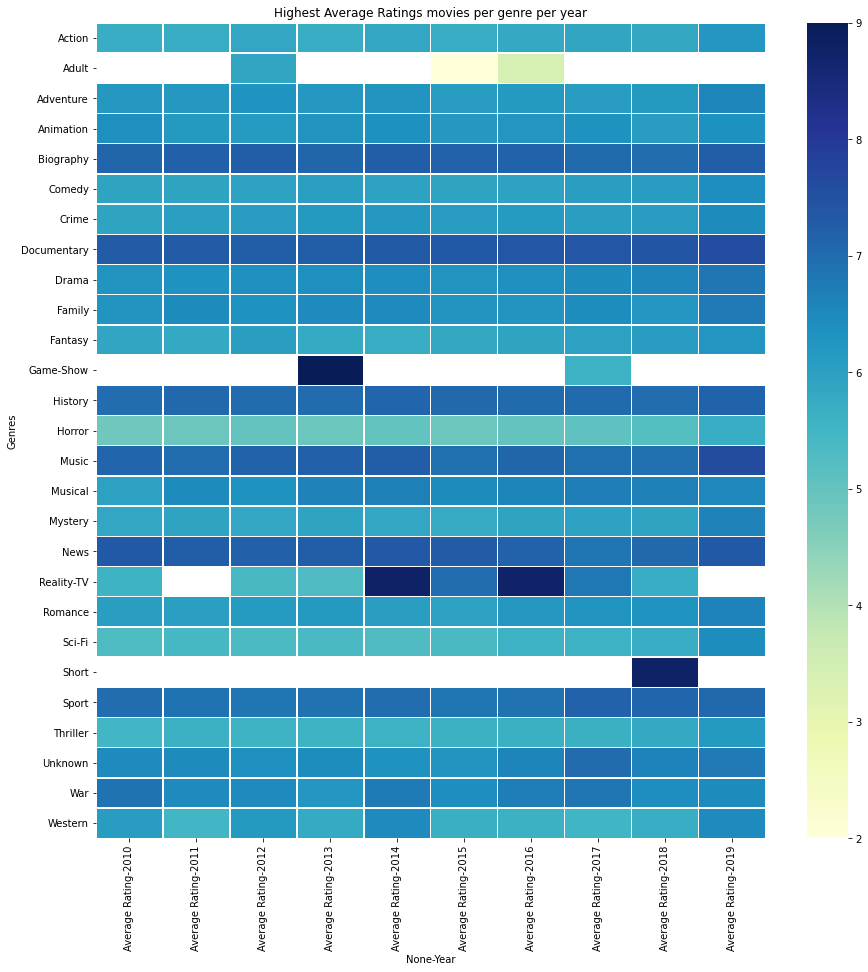

In [67]:
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_title('Highest Average Ratings movies per genre per year')
sns.heatmap(ratings_genres_pivot, linewidths=.5, cmap='YlGnBu');

Highest Average Ratings movies belong consistently to these genres:
- Biography
- Documentary
- Music
- News

In [68]:
# Votes Mean

In [69]:
votes_titles_mean = imdb_details_reviews.groupby(["Year"])["Votes Number"].mean()
votes_titles_mean

Year
2010    4488.480418
2011    4431.113953
2012    4261.238932
2013    4460.397622
2014    4107.310238
2015    3080.688721
2016    3052.597523
2017    2513.674280
2018    2193.447914
2019    1408.505046
Name: Votes Number, dtype: float64

In [70]:
# Ratings Mean 

In [71]:
ratings_titles_mean = imdb_details_reviews.groupby(["Year"])["Average Rating"].mean()
ratings_titles_mean

Year
2010    6.259585
2011    6.290134
2012    6.297057
2013    6.287259
2014    6.319806
2015    6.265894
2016    6.347300
2017    6.397624
2018    6.415599
2019    6.703578
Name: Average Rating, dtype: float64

In [72]:
#Relationship average ratings and votes number in IMDB per titles

In [73]:
imdb_titles_mean = imdb_details_reviews.groupby("Year").mean()
imdb_titles_mean

,Average Rating,Votes Number
Year,,
2010,6.259585,4488.480418
2011,6.290134,4431.113953
2012,6.297057,4261.238932
2013,6.287259,4460.397622
2014,6.319806,4107.310238
2015,6.265894,3080.688721
2016,6.347300,3052.597523
2017,6.397624,2513.674280
2018,6.415599,2193.447914


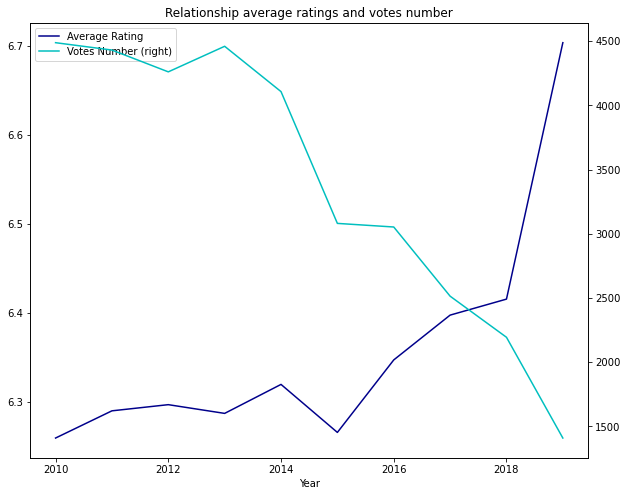

In [74]:
imdb_titles_mean[['Average Rating', 'Votes Number']].plot(title = 'Relationship average ratings and votes number',color=('DarkBlue','c'),figsize=(10, 8),secondary_y=["Votes Number"]);

The two trends start off evenly. As the time goes by the average ratings decrease while the votes number increase until they coincide and invert, having a low number of votes with very high average ratings.


In [75]:
###JOIN BOM and IMDB

In [76]:
### Domestic Market

In [77]:
imdb2
imdb2.reset_index()
imdb2.set_index("Primary Title")

,Year,Genres,Average Rating,Votes Number
Primary Title,,,,
Sunghursh,2013,"Action,Crime,Drama",7.0,77
One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
The Other Side of the Wind,2018,Drama,6.9,4517
Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...
Diabolik sono io,2019,Documentary,6.2,6
Sokagin Çocuklari,2019,"Drama,Family",8.7,136
Albatross,2017,Documentary,8.5,8


In [78]:
bom_titles
bom_titles.set_index("Primary Title")

,Year,Domestic Gross
Primary Title,,
Toy Story 3,2010,415000000.0
Alice in Wonderland (2010),2010,334200000.0
Iron Man 2,2010,312400000.0
The Twilight Saga: Eclipse,2010,300500000.0
Harry Potter and the Deathly Hallows Part 1,2010,296000000.0
...,...,...
Deadpool 2,2018,318500000.0
Dr. Seuss' The Grinch (2018),2018,270600000.0
Mission: Impossible - Fallout,2018,220200000.0


In [79]:
bom_for_titles
bom_for_titles.set_index("Primary Title")

,Year,Foreign Gross
Primary Title,,
Alice in Wonderland (2010),2010,691300000.0
Harry Potter and the Deathly Hallows Part 1,2010,664300000.0
Toy Story 3,2010,652000000.0
Inception,2010,535700000.0
Shrek Forever After,2010,513900000.0
...,...,...
Incredibles 2,2018,634200000.0
Operation Red Sea,2018,577700000.0
Mission: Impossible - Fallout,2018,571000000.0


In [80]:
### Join IMDB and BOM for DOMESTIC GROSS
new_df = imdb2.merge(bom_titles, how ="right", on = "Primary Title")
new_df

,Primary Title,Year_x,Genres,Average Rating,Votes Number,Year_y,Domestic Gross
0,Toy Story 3,2010.0,"Adventure,Animation,Comedy",8.3,682218.0,2010,415000000.0
1,Alice in Wonderland (2010),NaN,NaN,NaN,NaN,2010,334200000.0
2,Iron Man 2,2010.0,"Action,Adventure,Sci-Fi",7.0,657690.0,2010,312400000.0
3,The Twilight Saga: Eclipse,2010.0,"Adventure,Drama,Fantasy",5.0,211733.0,2010,300500000.0
4,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,NaN,2010,296000000.0
...,...,...,...,...,...,...,...
92,Deadpool 2,2018.0,"Action,Adventure,Comedy",7.8,391735.0,2018,318500000.0
93,Dr. Seuss' The Grinch (2018),NaN,NaN,NaN,NaN,2018,270600000.0
94,Mission: Impossible - Fallout,2018.0,"Action,Adventure,Thriller",7.8,233877.0,2018,220200000.0
95,Ant-Man and the Wasp,2018.0,"Action,Adventure,Comedy",7.1,244024.0,2018,216600000.0


In [81]:
### Cleaning the Join IMDB and BOM for DOMESTIC GROSS
new_df.isna().sum()

Primary Title      0
Year_x            13
Genres            13
Average Rating    13
Votes Number      13
Year_y             0
Domestic Gross     0
dtype: int64

In [82]:
new_df.reset_index()
new_df.drop(columns=["Year_x"], inplace= True)
new_df

,Primary Title,Genres,Average Rating,Votes Number,Year_y,Domestic Gross
0,Toy Story 3,"Adventure,Animation,Comedy",8.3,682218.0,2010,415000000.0
1,Alice in Wonderland (2010),NaN,NaN,NaN,2010,334200000.0
2,Iron Man 2,"Action,Adventure,Sci-Fi",7.0,657690.0,2010,312400000.0
3,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",5.0,211733.0,2010,300500000.0
4,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,2010,296000000.0
...,...,...,...,...,...,...
92,Deadpool 2,"Action,Adventure,Comedy",7.8,391735.0,2018,318500000.0
93,Dr. Seuss' The Grinch (2018),NaN,NaN,NaN,2018,270600000.0
94,Mission: Impossible - Fallout,"Action,Adventure,Thriller",7.8,233877.0,2018,220200000.0
95,Ant-Man and the Wasp,"Action,Adventure,Comedy",7.1,244024.0,2018,216600000.0


In [83]:
new_df = new_df.dropna()
new_df

,Primary Title,Genres,Average Rating,Votes Number,Year_y,Domestic Gross
0,Toy Story 3,"Adventure,Animation,Comedy",8.3,682218.0,2010,415000000.0
2,Iron Man 2,"Action,Adventure,Sci-Fi",7.0,657690.0,2010,312400000.0
3,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",5.0,211733.0,2010,300500000.0
5,Inception,"Action,Adventure,Sci-Fi",8.8,1841066.0,2010,292600000.0
6,Despicable Me,"Animation,Comedy,Family",7.7,464511.0,2010,251500000.0
...,...,...,...,...,...,...
91,Aquaman,"Action,Adventure,Fantasy",7.1,263328.0,2018,335100000.0
92,Deadpool 2,"Action,Adventure,Comedy",7.8,391735.0,2018,318500000.0
94,Mission: Impossible - Fallout,"Action,Adventure,Thriller",7.8,233877.0,2018,220200000.0
95,Ant-Man and the Wasp,"Action,Adventure,Comedy",7.1,244024.0,2018,216600000.0


In [84]:
new_df = new_df.rename(columns={"Year_y": "Year"})
new_df

,Primary Title,Genres,Average Rating,Votes Number,Year,Domestic Gross
0,Toy Story 3,"Adventure,Animation,Comedy",8.3,682218.0,2010,415000000.0
2,Iron Man 2,"Action,Adventure,Sci-Fi",7.0,657690.0,2010,312400000.0
3,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",5.0,211733.0,2010,300500000.0
5,Inception,"Action,Adventure,Sci-Fi",8.8,1841066.0,2010,292600000.0
6,Despicable Me,"Animation,Comedy,Family",7.7,464511.0,2010,251500000.0
...,...,...,...,...,...,...
91,Aquaman,"Action,Adventure,Fantasy",7.1,263328.0,2018,335100000.0
92,Deadpool 2,"Action,Adventure,Comedy",7.8,391735.0,2018,318500000.0
94,Mission: Impossible - Fallout,"Action,Adventure,Thriller",7.8,233877.0,2018,220200000.0
95,Ant-Man and the Wasp,"Action,Adventure,Comedy",7.1,244024.0,2018,216600000.0


In [85]:
#Genres to which belong the most gaining movies 
ds = new_df["Genres"].str.split(",").apply(pd.Series, 1).stack()
ds.index = ds.index.droplevel(-1)
ds.name = "Genres"
del new_df["Genres"]
ds_split = new_df.join(ds)
ds_split

,Primary Title,Average Rating,Votes Number,Year,Domestic Gross,Genres
0,Toy Story 3,8.3,682218.0,2010,415000000.0,Adventure
0,Toy Story 3,8.3,682218.0,2010,415000000.0,Animation
0,Toy Story 3,8.3,682218.0,2010,415000000.0,Comedy
2,Iron Man 2,7.0,657690.0,2010,312400000.0,Action
2,Iron Man 2,7.0,657690.0,2010,312400000.0,Adventure
...,...,...,...,...,...,...
95,Ant-Man and the Wasp,7.1,244024.0,2018,216600000.0,Adventure
95,Ant-Man and the Wasp,7.1,244024.0,2018,216600000.0,Comedy
96,Bohemian Rhapsody,8.0,345466.0,2018,216400000.0,Biography
96,Bohemian Rhapsody,8.0,345466.0,2018,216400000.0,Drama


In [86]:
ds_genres = ds_split.groupby(["Year", "Genres"])["Domestic Gross"].mean().reset_index()
ds_genres

,Year,Genres,Domestic Gross
0,2010,Action,2.742000e+08
1,2010,Adventure,2.825143e+08
2,2010,Animation,2.647200e+08
3,2010,Comedy,2.765000e+08
4,2010,Drama,3.005000e+08
...,...,...,...
80,2018,Drama,2.164000e+08
81,2018,Fantasy,3.351000e+08
82,2018,Music,2.164000e+08
83,2018,Sci-Fi,5.988667e+08


In [87]:
ds_genres_pivot = pd.pivot_table(ds_genres, values=["Domestic Gross"], index =["Genres"], columns=["Year"])
ds_genres_pivot

Domestic Gross                                            \
Year                  2010          2011          2012          2013   
Genres                                                                 
Action        2.742000e+08  2.300833e+08  3.556250e+08  3.408500e+08   
Adventure     2.825143e+08  2.270333e+08  2.885167e+08  3.526375e+08   
Animation     2.647200e+08  1.915000e+08  2.268500e+08  3.457667e+08   
Biography              NaN           NaN           NaN           NaN   
Comedy        2.765000e+08  2.230000e+08  2.241667e+08  3.457667e+08   
Crime                  NaN  1.983000e+08           NaN  2.387000e+08   
Documentary            NaN           NaN           NaN           NaN   
Drama         3.005000e+08           NaN           NaN  3.374000e+08   
Family        2.515000e+08           NaN  3.030000e+08           NaN   
Fantasy       3.005000e+08  2.110500e+08  2.609000e+08  3.295500e+08   
History                NaN           NaN           NaN           NaN   
Horror                 NaN           NaN           NaN           NaN   
Music                  NaN           NaN           NaN           NaN   
Mystery                NaN  2.545000e+08           NaN           NaN   
Romance                NaN           NaN           NaN  4.007000e+08   
Sci-Fi        3.025000e+08  3.524000e+08  3.350000e+08  3.497000e+08   
Sport                  NaN           NaN           NaN  4.007000e+08   
Thriller               NaN  2.096000e+08  3.762500e+08  2.564000e+08   

                                                                   \
Year                2014          2015         2016          2017   
Genres                                                              
Action       277925000.0  3.892200e+08  391780000.0  3.864857e+08   
Adventure    266050000.0  3.591429e+08  394362500.0  3.712500e+08   
Animation    222500000.0  3.462500e+08  366600000.0  2.646000e+08   
Biography    350100000.0  3.565000e+08          NaN           NaN   
Comedy       333200000.0  3.462500e+08  365900000.0  3.435000e+08   
Crime                NaN  3.547500e+08          NaN           NaN   
Documentary          NaN  3.565000e+08          NaN  4.126000e+08   
Drama        350100000.0  2.924500e+08          NaN  4.126000e+08   
Family       241400000.0  3.565000e+08  270400000.0           NaN   
Fantasy      255100000.0           NaN  327750000.0  4.206000e+08   
History              NaN  3.565000e+08          NaN           NaN   
Horror               NaN           NaN          NaN  3.275000e+08   
Music                NaN           NaN          NaN           NaN   
Mystery              NaN           NaN          NaN           NaN   
Romance              NaN           NaN          NaN           NaN   
Sci-Fi       269050000.0  4.053500e+08  470150000.0  3.734000e+08   
Sport                NaN           NaN          NaN  4.126000e+08   
Thriller             NaN  2.765500e+08          NaN  3.275000e+08   

                           
Year                 2018  
Genres                     
Action       4.369500e+08  
Adventure    4.369500e+08  
Animation    6.086000e+08  
Biography    2.164000e+08  
Comedy       2.675500e+08  
Crime                 NaN  
Documentary           NaN  
Drama        2.164000e+08  
Family                NaN  
Fantasy      3.351000e+08  
History               NaN  
Horror                NaN  
Music        2.164000e+08  
Mystery               NaN  
Romance               NaN  
Sci-Fi       5.988667e+08  
Sport                 NaN  
Thriller     2.202000e+08

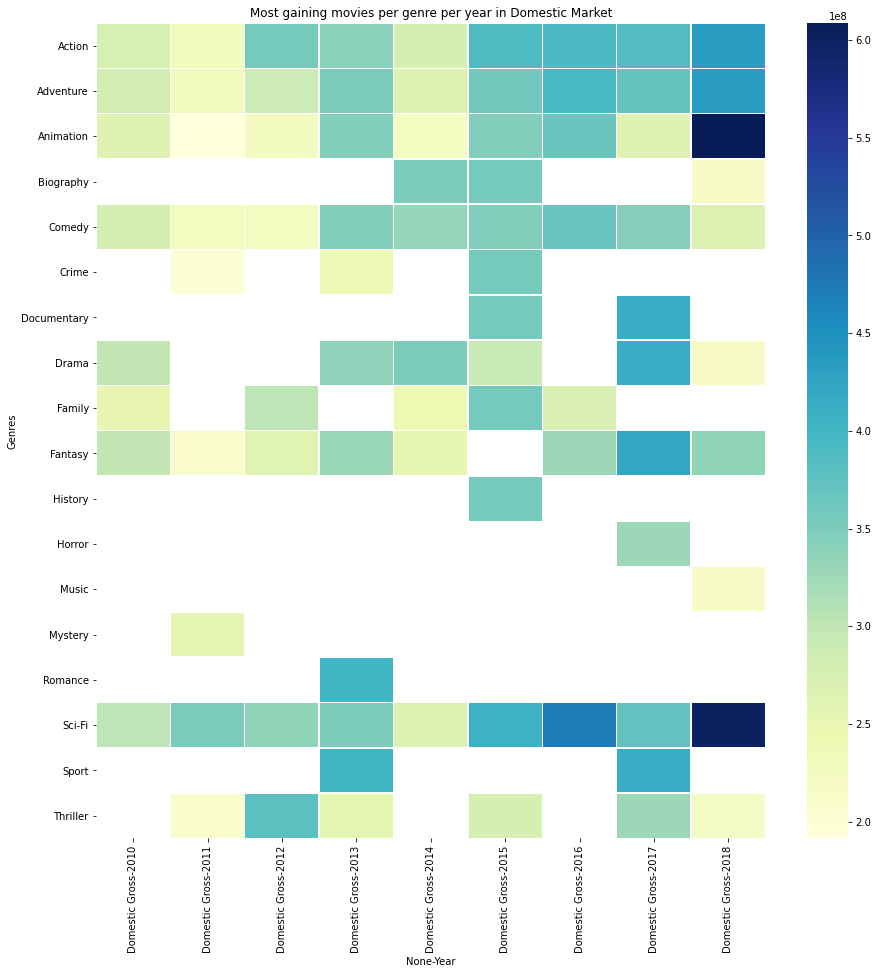

In [88]:
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_title('Most gaining movies per genre per year in Domestic Market')
sns.heatmap(ds_genres_pivot, linewidths=.5, cmap='YlGnBu');

Most gaining movies in the domestic market produced belong consistently to these genres:
- Sci fi 
- Action
- Adventure
- Animation

In [89]:
# Relationship between Domestic Gross and Average Ratings

In [90]:
ds_corr = ds_split.corr(method='pearson')
ds_corr

,Average Rating,Votes Number,Year,Domestic Gross
Average Rating,1.000000,0.583605,0.041836,0.090240
Votes Number,0.583605,1.000000,-0.275571,0.081191
Year,0.041836,-0.275571,1.000000,0.425988
Domestic Gross,0.090240,0.081191,0.425988,1.000000


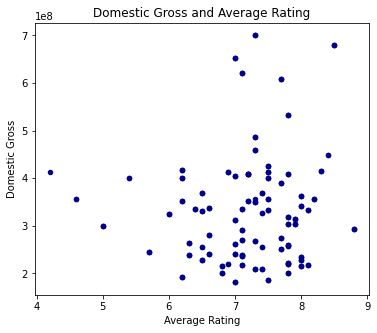

In [91]:
ds_split.plot.scatter(x="Average Rating", y='Domestic Gross',title='Domestic Gross and Average Rating',color='DarkBlue',figsize=(6,5));

Correlation between Average Rating and Votes Number: 0.583605. Strong correlation.
Correlation between Average Rating, Votes Number and Domestic Gross: 0.090240, 0.081191. Small Correlation.
The latter is confirmed by the graphs in the below visualizations.

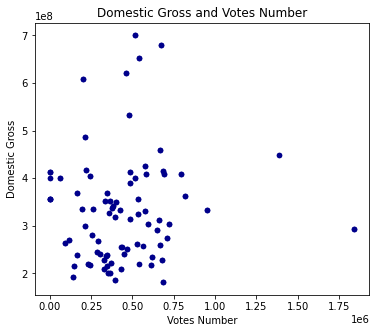

In [92]:
ds_split.plot.scatter(x='Votes Number', y='Domestic Gross',title='Domestic Gross and Votes Number',color='DarkBlue',figsize=(6,5));

In [93]:
new_ff = imdb2.merge(bom_for_titles, how ="right", on = "Primary Title")
new_ff

,Primary Title,Year_x,Genres,Average Rating,Votes Number,Year_y,Foreign Gross
0,Alice in Wonderland (2010),NaN,NaN,NaN,NaN,2010,691300000.0
1,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,NaN,2010,664300000.0
2,Toy Story 3,2010.0,"Adventure,Animation,Comedy",8.3,682218.0,2010,652000000.0
3,Inception,2010.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,2010,535700000.0
4,Shrek Forever After,2010.0,"Adventure,Animation,Comedy",6.3,167532.0,2010,513900000.0
...,...,...,...,...,...,...,...
92,Incredibles 2,2018.0,"Action,Adventure,Animation",7.7,203510.0,2018,634200000.0
93,Operation Red Sea,2018.0,"Action,Drama,Thriller",6.7,4624.0,2018,577700000.0
94,Mission: Impossible - Fallout,2018.0,"Action,Adventure,Thriller",7.8,233877.0,2018,571000000.0
95,Detective Chinatown 2,2018.0,"Action,Comedy,Mystery",6.1,1250.0,2018,542100000.0


In [94]:
new_ff.reset_index()

,index,Primary Title,Year_x,Genres,Average Rating,Votes Number,Year_y,Foreign Gross
0,0,Alice in Wonderland (2010),NaN,NaN,NaN,NaN,2010,691300000.0
1,1,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,NaN,2010,664300000.0
2,2,Toy Story 3,2010.0,"Adventure,Animation,Comedy",8.3,682218.0,2010,652000000.0
3,3,Inception,2010.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,2010,535700000.0
4,4,Shrek Forever After,2010.0,"Adventure,Animation,Comedy",6.3,167532.0,2010,513900000.0
...,...,...,...,...,...,...,...,...
92,92,Incredibles 2,2018.0,"Action,Adventure,Animation",7.7,203510.0,2018,634200000.0
93,93,Operation Red Sea,2018.0,"Action,Drama,Thriller",6.7,4624.0,2018,577700000.0
94,94,Mission: Impossible - Fallout,2018.0,"Action,Adventure,Thriller",7.8,233877.0,2018,571000000.0
95,95,Detective Chinatown 2,2018.0,"Action,Comedy,Mystery",6.1,1250.0,2018,542100000.0


In [95]:
new_ff.drop(columns = {"Year_x"}, inplace = True)
new_ff

,Primary Title,Genres,Average Rating,Votes Number,Year_y,Foreign Gross
0,Alice in Wonderland (2010),NaN,NaN,NaN,2010,691300000.0
1,Harry Potter and the Deathly Hallows Part 1,NaN,NaN,NaN,2010,664300000.0
2,Toy Story 3,"Adventure,Animation,Comedy",8.3,682218.0,2010,652000000.0
3,Inception,"Action,Adventure,Sci-Fi",8.8,1841066.0,2010,535700000.0
4,Shrek Forever After,"Adventure,Animation,Comedy",6.3,167532.0,2010,513900000.0
...,...,...,...,...,...,...
92,Incredibles 2,"Action,Adventure,Animation",7.7,203510.0,2018,634200000.0
93,Operation Red Sea,"Action,Drama,Thriller",6.7,4624.0,2018,577700000.0
94,Mission: Impossible - Fallout,"Action,Adventure,Thriller",7.8,233877.0,2018,571000000.0
95,Detective Chinatown 2,"Action,Comedy,Mystery",6.1,1250.0,2018,542100000.0


In [96]:
new_ff.dropna(inplace = True)
new_ff

,Primary Title,Genres,Average Rating,Votes Number,Year_y,Foreign Gross
2,Toy Story 3,"Adventure,Animation,Comedy",8.3,682218.0,2010,652000000.0
3,Inception,"Action,Adventure,Sci-Fi",8.8,1841066.0,2010,535700000.0
4,Shrek Forever After,"Adventure,Animation,Comedy",6.3,167532.0,2010,513900000.0
5,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",5.0,211733.0,2010,398000000.0
6,Tangled,"Adventure,Animation,Comedy",7.8,366366.0,2010,391000000.0
...,...,...,...,...,...,...
92,Incredibles 2,"Action,Adventure,Animation",7.7,203510.0,2018,634200000.0
93,Operation Red Sea,"Action,Drama,Thriller",6.7,4624.0,2018,577700000.0
94,Mission: Impossible - Fallout,"Action,Adventure,Thriller",7.8,233877.0,2018,571000000.0
95,Detective Chinatown 2,"Action,Comedy,Mystery",6.1,1250.0,2018,542100000.0


In [97]:
new_ff.rename(columns ={"Year_y": "Year"}, inplace = True)

In [98]:
new_ff

,Primary Title,Genres,Average Rating,Votes Number,Year,Foreign Gross
2,Toy Story 3,"Adventure,Animation,Comedy",8.3,682218.0,2010,652000000.0
3,Inception,"Action,Adventure,Sci-Fi",8.8,1841066.0,2010,535700000.0
4,Shrek Forever After,"Adventure,Animation,Comedy",6.3,167532.0,2010,513900000.0
5,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",5.0,211733.0,2010,398000000.0
6,Tangled,"Adventure,Animation,Comedy",7.8,366366.0,2010,391000000.0
...,...,...,...,...,...,...
92,Incredibles 2,"Action,Adventure,Animation",7.7,203510.0,2018,634200000.0
93,Operation Red Sea,"Action,Drama,Thriller",6.7,4624.0,2018,577700000.0
94,Mission: Impossible - Fallout,"Action,Adventure,Thriller",7.8,233877.0,2018,571000000.0
95,Detective Chinatown 2,"Action,Comedy,Mystery",6.1,1250.0,2018,542100000.0


In [99]:
fs = new_ff["Genres"].str.split(",").apply(pd.Series, 1).stack()
fs.index = fs.index.droplevel(-1)
fs.name = "Genres"
del new_ff["Genres"]
fs_split = new_ff.join(fs)
fs_split

,Primary Title,Average Rating,Votes Number,Year,Foreign Gross,Genres
2,Toy Story 3,8.3,682218.0,2010,652000000.0,Adventure
2,Toy Story 3,8.3,682218.0,2010,652000000.0,Animation
2,Toy Story 3,8.3,682218.0,2010,652000000.0,Comedy
3,Inception,8.8,1841066.0,2010,535700000.0,Action
3,Inception,8.8,1841066.0,2010,535700000.0,Adventure
...,...,...,...,...,...,...
95,Detective Chinatown 2,6.1,1250.0,2018,542100000.0,Comedy
95,Detective Chinatown 2,6.1,1250.0,2018,542100000.0,Mystery
96,Fantastic Beasts: The Crimes of Grindelwald,6.6,163151.0,2018,494100000.0,Adventure
96,Fantastic Beasts: The Crimes of Grindelwald,6.6,163151.0,2018,494100000.0,Family


In [100]:
fs_genres_pivot = pd.pivot_table(fs_split, values=["Foreign Gross"], index =["Genres"], columns=["Year"])
fs_genres_pivot

Foreign Gross                                            \
Year                 2010          2011          2012          2013   
Genres                                                                
Action       4.236000e+08  5.639500e+08  6.456333e+08  5.268600e+08   
Adventure    4.447714e+08  5.370286e+08  6.247667e+08  6.237889e+08   
Animation    5.189667e+08  4.244750e+08  6.232000e+08  5.885250e+08   
Biography             NaN           NaN           NaN           NaN   
Comedy       5.189667e+08  3.959000e+08  6.232000e+08  6.513667e+08   
Crime                 NaN  4.163000e+08           NaN  5.500000e+08   
Documentary           NaN           NaN           NaN           NaN   
Drama        3.980000e+08           NaN  4.840000e+08  6.624000e+08   
Family       3.113000e+08           NaN  7.181000e+08           NaN   
Fantasy      3.546500e+08  8.046000e+08  6.010500e+08  6.713000e+08   
History               NaN           NaN           NaN           NaN   
Horror                NaN           NaN           NaN           NaN   
Music                 NaN           NaN           NaN           NaN   
Mystery               NaN           NaN           NaN           NaN   
Romance               NaN           NaN           NaN  8.757000e+08   
Sci-Fi       4.236000e+08  7.714000e+08  4.959000e+08  5.650667e+08   
Sport                 NaN           NaN           NaN  8.757000e+08   
Thriller              NaN  4.508000e+08  7.205000e+08  4.995500e+08   

                                                                    \
Year                2014          2015          2016          2017   
Genres                                                               
Action       529625000.0  5.671400e+08  5.643750e+08  6.171571e+08   
Adventure    542730000.0  5.702375e+08  5.699143e+08  6.025125e+08   
Animation    444500000.0  6.622500e+08  5.773000e+08  6.838000e+08   
Biography            NaN  4.252000e+08           NaN           NaN   
Comedy       440200000.0  6.622500e+08  5.773000e+08  6.160250e+08   
Crime                NaN  5.011000e+08           NaN           NaN   
Documentary          NaN  5.011000e+08           NaN           NaN   
Drama        495750000.0  4.358667e+08           NaN  8.676000e+08   
Family       517100000.0  5.011000e+08           NaN           NaN   
Fantasy      700900000.0           NaN  4.942000e+08  6.673500e+08   
History              NaN  5.011000e+08           NaN           NaN   
Horror               NaN  3.493000e+08           NaN  5.974000e+08   
Music                NaN           NaN           NaN           NaN   
Mystery              NaN           NaN           NaN           NaN   
Romance              NaN  4.048000e+08           NaN           NaN   
Sci-Fi       564500000.0  5.732667e+08  6.345500e+08  5.106500e+08   
Sport                NaN           NaN           NaN           NaN   
Thriller             NaN  5.243667e+08           NaN  8.676000e+08   

                           
Year                 2018  
Genres                     
Action       6.680571e+08  
Adventure    6.751167e+08  
Animation    6.342000e+08  
Biography    6.872000e+08  
Comedy       5.421000e+08  
Crime                 NaN  
Documentary           NaN  
Drama        6.324500e+08  
Family       4.941000e+08  
Fantasy      6.534000e+08  
History               NaN  
Horror                NaN  
Music        6.872000e+08  
Mystery      5.421000e+08  
Romance               NaN  
Sci-Fi       7.693500e+08  
Sport                 NaN  
Thriller     5.743500e+08

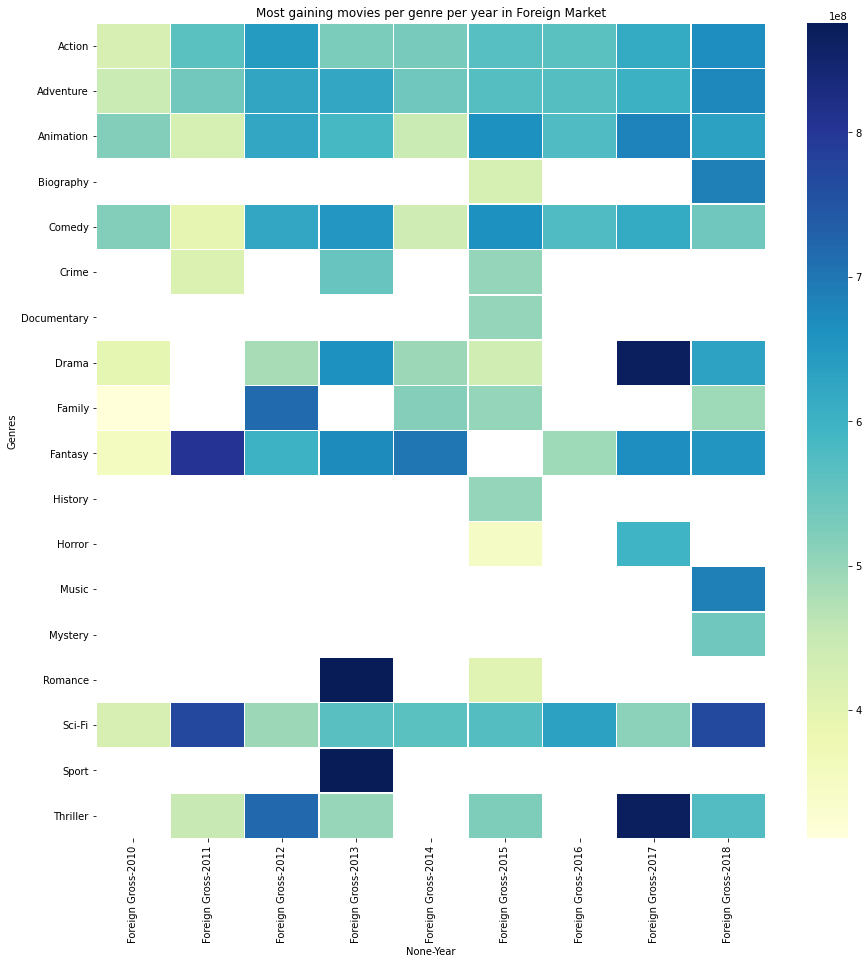

In [101]:
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_title('Most gaining movies per genre per year in Foreign Market')
sns.heatmap(fs_genres_pivot, linewidths=.5, cmap='YlGnBu');

Most gaining movies in the foreign market produced belong consistently to these genres:
- Sci fi 
- Action
- Adventure
- Animation
- Fantasy
- Comedy

In [102]:
fs_corr = fs_split.corr(method='pearson')
fs_corr

,Average Rating,Votes Number,Year,Foreign Gross
Average Rating,1.000000,0.619436,0.010378,-0.040676
Votes Number,0.619436,1.000000,-0.252036,-0.035036
Year,0.010378,-0.252036,1.000000,0.248220
Foreign Gross,-0.040676,-0.035036,0.248220,1.000000


Correlation between Average Rating and Votes Number for movies genres in foreign market: 0.619436. Strong Correlation.
Correlation between Average Rating, Votes Number and Foreign Gross: -0.040676, -0.035036. Small Correlation.
The latter is confirmed by the graphs in the below visualizations. 

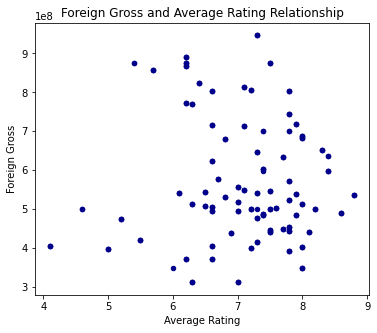

In [103]:
fs_split.plot.scatter(x="Average Rating", y='Foreign Gross',title='Foreign Gross and Average Rating Relationship',color='DarkBlue',figsize=(6,5));

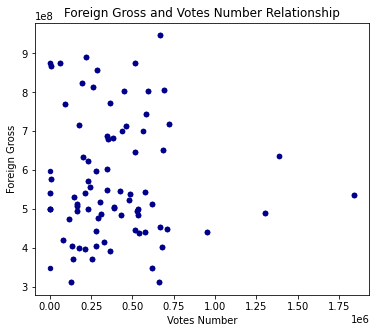

In [104]:
fs_split.plot.scatter(x='Votes Number', y='Foreign Gross',title='Foreign Gross and Votes Number Relationship',color='DarkBlue',figsize=(6,5));

# Further Findings 

Production Studios

In [105]:
# Production Studios which produced more movies

In [106]:
bom_movies

,Primary Title,Production Studio,Domestic Gross,Foreign Gross,Year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [107]:
bom_prod = bom_movies.groupby(["Production Studio"])["Primary Title"].nunique().reset_index()
bom_prod = bom_prod.sort_values(by = ["Primary Title"], ascending = False).iloc[:20]
bom_prod

,Production Studio,Primary Title
155,Uni.,144
57,Fox,134
164,WB,130
142,Sony,105
22,BV,104
126,Par.,94
89,LGF,87
169,Wein.,69
71,IFC,68
137,SPC,59


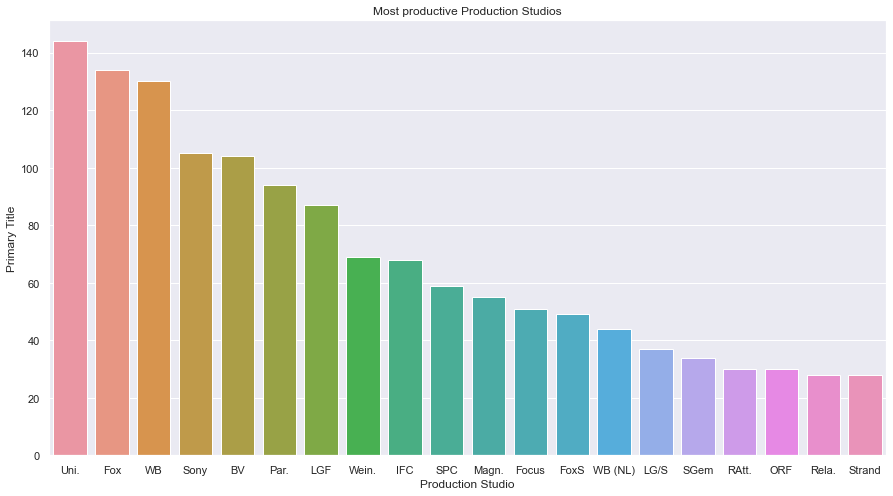

In [108]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='Production Studio', y='Primary Title', data=bom_prod)
ax.set_title('Most productive Production Studios');

Production Studios which produced more:
- Universal
- Fox
- Warner Bros
- Sony
- BV (Buena Vista)

In [109]:
bom_prod_year = bom_movies.groupby(["Year","Production Studio"])["Primary Title"].nunique().reset_index()
bom_prod_year

,Year,Production Studio,Primary Title
0,2010,3D,1
1,2010,ATO,1
2,2010,Abr.,1
3,2010,Anch.,6
4,2010,App.,1
...,...,...,...
490,2018,VPD,3
491,2018,WB,15
492,2018,WB (NL),5
493,2018,WGUSA,4


In [110]:
year_prod_pivot = pd.pivot_table(bom_prod_year, values=["Primary Title"], index =["Production Studio"], columns=["Year"])
year_prod_pivot

Primary Title                                           
Year                       2010 2011  2012  2013  2014 2015 2016 2017 2018
Production Studio                                                         
3D                          1.0  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN
A24                         NaN  NaN   NaN   2.0   4.0  3.0  5.0  3.0  2.0
AF                          NaN  NaN   2.0   NaN   NaN  NaN  NaN  NaN  NaN
AGF                         NaN  1.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN
AR                          NaN  NaN   NaN   NaN   NaN  NaN  1.0  NaN  NaN
...                         ...  ...   ...   ...   ...  ...  ...  ...  ...
WOW                         1.0  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN
Wein.                       4.0  9.0  12.0  14.0  14.0  9.0  2.0  5.0  NaN
Yash                        1.0  NaN   NaN   1.0   NaN  NaN  2.0  1.0  1.0
Zee                         NaN  NaN   NaN   NaN   NaN  NaN  1.0  NaN  NaN
Zeit.                       2.0  1.0   1.0   NaN   1.0  NaN  NaN  NaN  NaN

[173 rows x 9 columns]

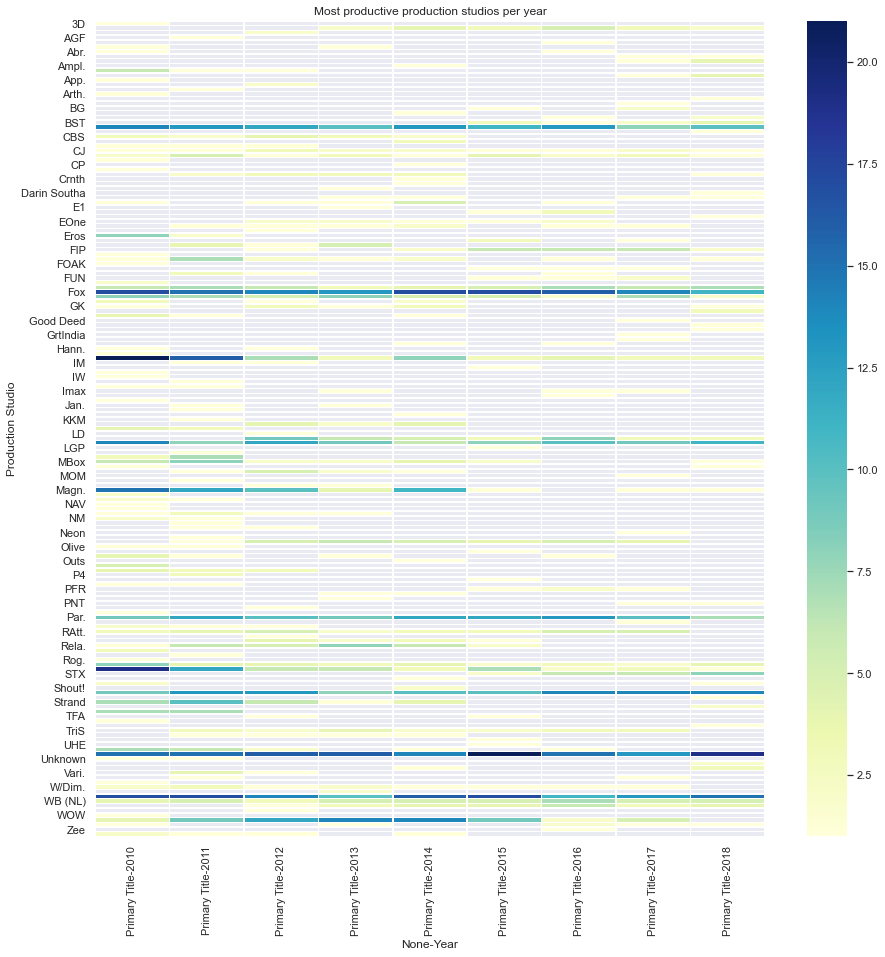

In [111]:
fig, ax = plt.subplots(figsize=(15,15)) 
ax.set_title('Most productive production studios per year')
sns.heatmap(year_prod_pivot, linewidths=.5, cmap='YlGnBu');

In [112]:
# Production Studios which produced the most gaining movies

In [113]:
new_prod = bom_movies.copy()
new_prod["Total Gross"] = new_prod["Domestic Gross"] + new_prod["Foreign Gross"]
new_prod

,Primary Title,Production Studio,Domestic Gross,Foreign Gross,Year,Total Gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [114]:
new_prod.groupby(["Year", "Production Studio"])["Total Gross"].mean().reset_index()

,Year,Production Studio,Total Gross
0,2010,3D,1.600000e+07
1,2010,ATO,1.040700e+06
2,2010,Abr.,1.147000e+06
3,2010,Anch.,3.285683e+06
4,2010,App.,4.700000e+06
...,...,...,...
490,2018,VPD,3.213867e+07
491,2018,WB,3.662867e+08
492,2018,WB (NL),2.110600e+08
493,2018,WGUSA,1.989345e+08


In [115]:
new_prod_pivot = pd.pivot_table(new_prod, values=["Total Gross"], index =["Production Studio"], columns=["Year"])
new_prod_pivot

Total Gross                                            \
Year                      2010          2011          2012          2013   
Production Studio                                                          
3D                  16000000.0           NaN           NaN           NaN   
A24                        NaN           NaN           NaN  2.540000e+07   
AF                         NaN           NaN  2.327500e+06           NaN   
AGF                        NaN  1.768000e+05           NaN           NaN   
AR                         NaN           NaN           NaN           NaN   
...                        ...           ...           ...           ...   
WOW                    49400.0           NaN           NaN           NaN   
Wein.              117739500.0  3.985622e+07  1.037249e+08  4.726057e+07   
Yash                  104500.0           NaN           NaN  8.800000e+07   
Zee                        NaN           NaN           NaN           NaN   
Zeit.                7205000.0  2.171200e+06  1.517000e+06           NaN   

                                                                       \
Year                       2014          2015        2016        2017   
Production Studio                                                       
3D                          NaN           NaN         NaN         NaN   
A24                6.000000e+06  2.983333e+07  21914200.0  42700000.0   
AF                          NaN           NaN         NaN         NaN   
AGF                         NaN           NaN         NaN         NaN   
AR                          NaN           NaN  58050000.0         NaN   
...                         ...           ...         ...         ...   
WOW                         NaN           NaN         NaN         NaN   
Wein.              4.136718e+07  5.284671e+07  76950000.0  30246200.0   
Yash                        NaN           NaN  57750000.0  87400000.0   
Zee                         NaN           NaN   1671000.0         NaN   
Zeit.              3.931000e+06           NaN         NaN         NaN   

                               
Year                     2018  
Production Studio              
3D                        NaN  
A24                48474000.0  
AF                        NaN  
AGF                       NaN  
AR                        NaN  
...                       ...  
WOW                       NaN  
Wein.                     NaN  
Yash                4230000.0  
Zee                       NaN  
Zeit.                     NaN  

[173 rows x 9 columns]

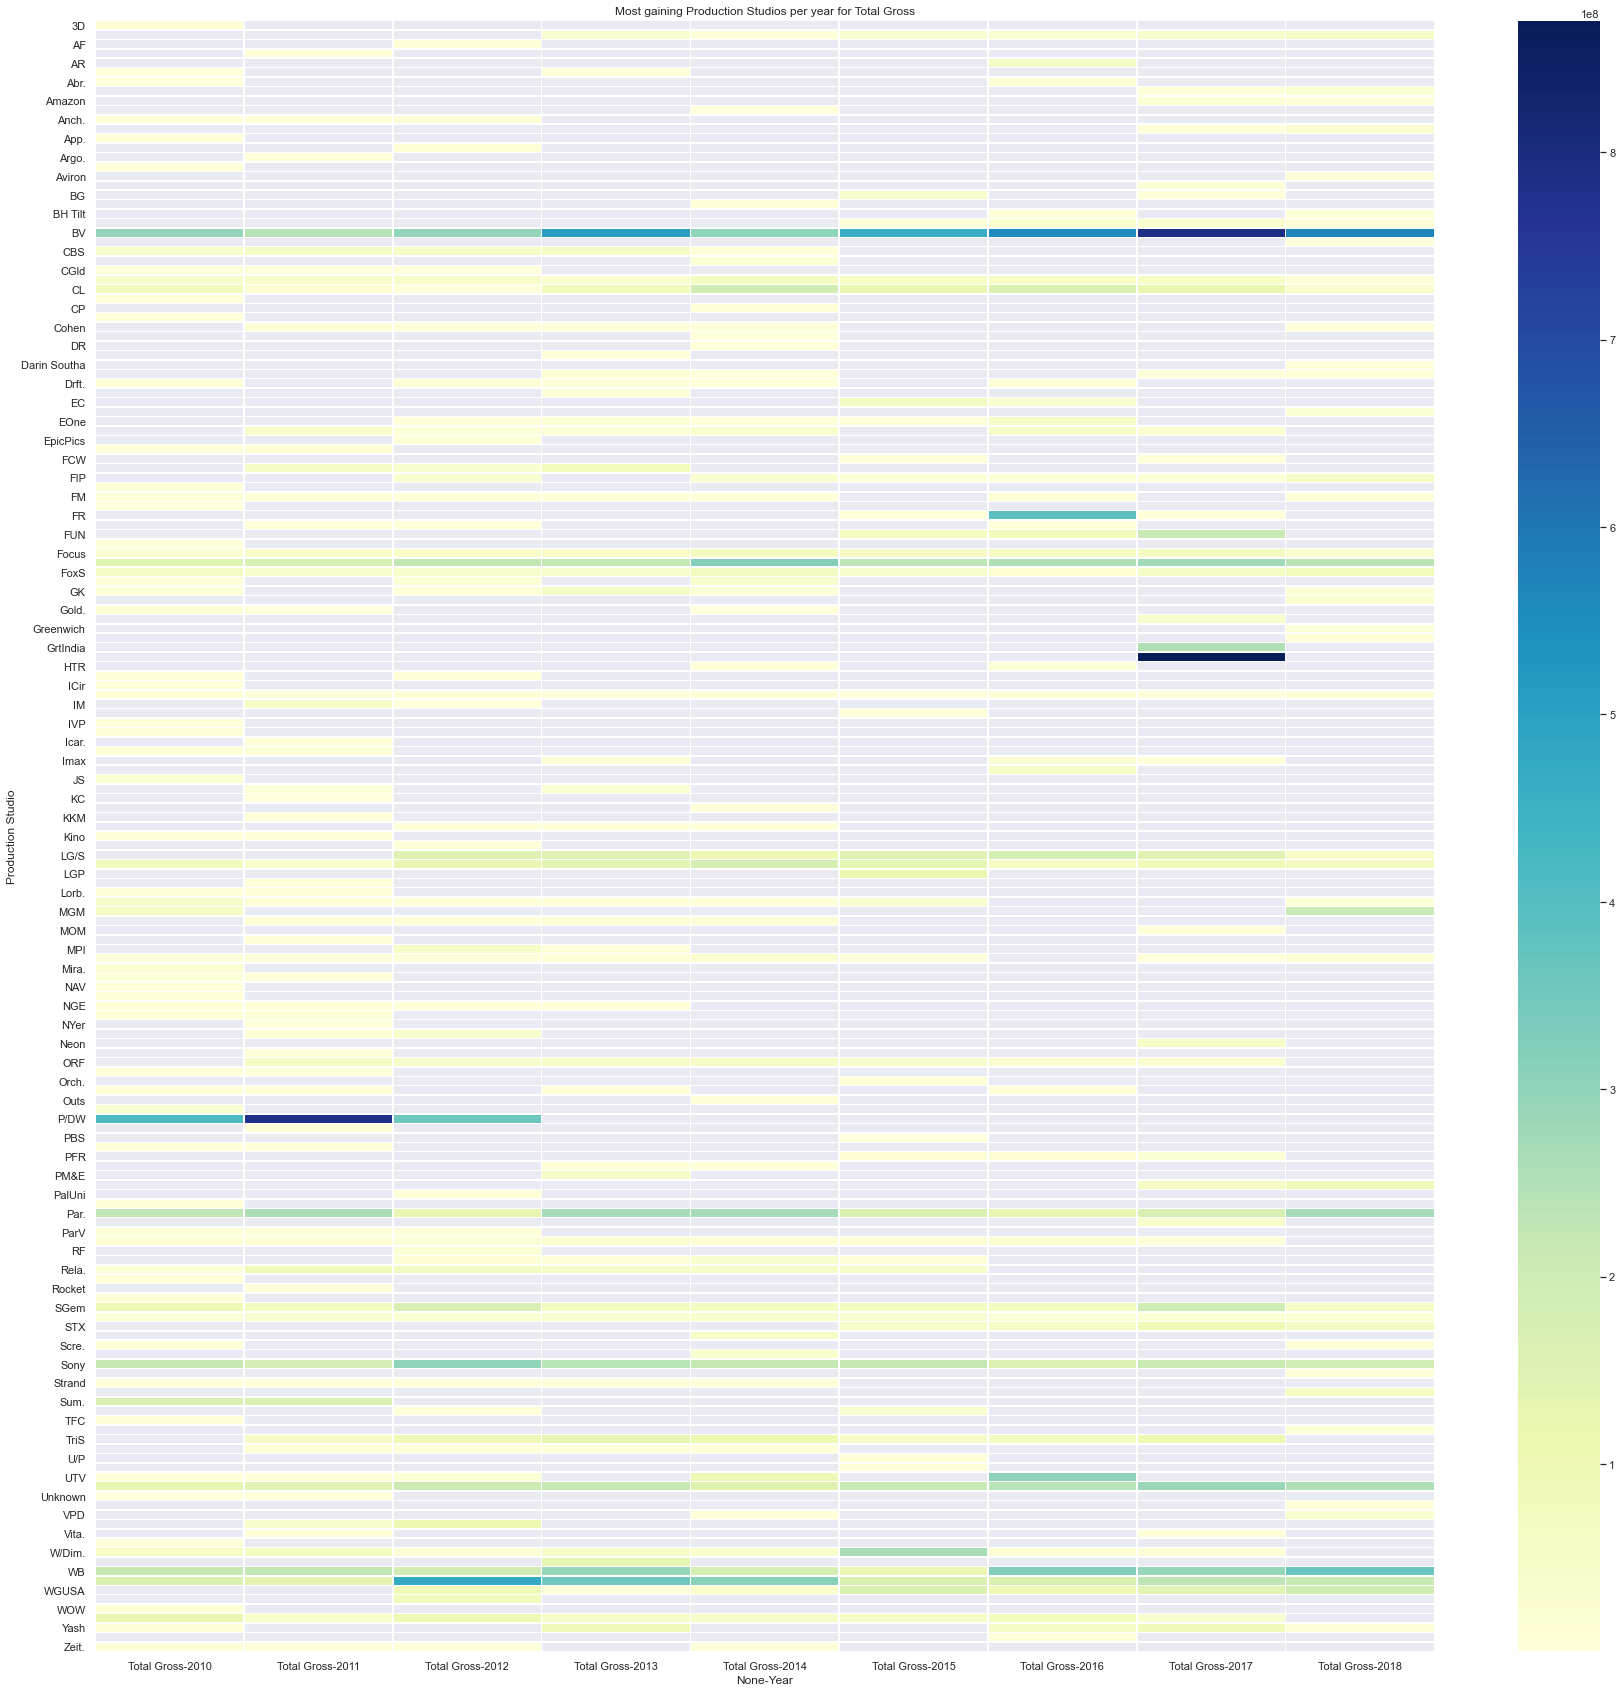

In [116]:
fig, ax = plt.subplots(figsize=(30,30)) 
ax.set_title('Most gaining Production Studios per year for Total Gross')
sns.heatmap(new_prod_pivot, linewidths=.5, cmap='YlGnBu');

Most earning production studios:
- BV (Buena Vista)
- Focus
- Warner Bros

In [117]:
# Production Studios which produced most voted movies

In [118]:
votes_pr = bom_movies.reset_index()
votes_pr.set_index("Primary Title")

,index,Production Studio,Domestic Gross,Foreign Gross,Year
Primary Title,,,,,
Toy Story 3,0,BV,415000000.0,652000000.0,2010
Alice in Wonderland (2010),1,BV,334200000.0,691300000.0,2010
Harry Potter and the Deathly Hallows Part 1,2,WB,296000000.0,664300000.0,2010
Inception,3,WB,292600000.0,535700000.0,2010
Shrek Forever After,4,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
I Still See You,3275,LGF,1400.0,1500000.0,2018
The Catcher Was a Spy,3286,IFC,725000.0,229000.0,2018
Time Freak,3309,Grindstone,10000.0,256000.0,2018


In [119]:
imdb2

,Primary Title,Year,Genres,Average Rating,Votes Number
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,Unknown,6.6,5


In [120]:
votes_prod = imdb2.sort_values(by = ["Votes Number"], ascending = False).iloc[:100]
votes_prod.reset_index()
votes_prod.set_index("Primary Title")

,Year,Genres,Average Rating,Votes Number
Primary Title,,,,
Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
Django Unchained,2012,"Drama,Western",8.4,1211405
The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...
Ex Machina,2014,"Drama,Mystery,Sci-Fi",7.7,424542
The Perks of Being a Wallflower,2012,Drama,8.0,422671
American Hustle,2013,"Crime,Drama",7.2,418221


In [121]:
prod_mt = votes_pr.merge(votes_prod, how= "right", on = "Primary Title")
prod_mt

,index,Primary Title,Production Studio,Domestic Gross,Foreign Gross,Year_x,Year_y,Genres,Average Rating,Votes Number
0,3.0,Inception,WB,292600000.0,535700000.0,2010.0,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,729.0,The Dark Knight Rises,WB,448100000.0,636800000.0,2012.0,2012,"Action,Thriller",8.4,1387769
2,1486.0,Interstellar,Par.,188000000.0,489400000.0,2014.0,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,743.0,Django Unchained,Wein.,162800000.0,262600000.0,2012.0,2012,"Drama,Western",8.4,1211405
4,NaN,The Avengers,NaN,NaN,NaN,NaN,2012,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...,...,...,...
95,1994.0,Ex Machina,A24,25400000.0,11400000.0,2015.0,2014,"Drama,Mystery,Sci-Fi",7.7,424542
96,849.0,The Perks of Being a Wallflower,LG/S,17700000.0,15600000.0,2012.0,2012,Drama,8.0,422671
97,1158.0,American Hustle,Sony,150100000.0,101100000.0,2013.0,2013,"Crime,Drama",7.2,418221
98,1595.0,Nightcrawler,ORF,32400000.0,6300000.0,2014.0,2014,"Crime,Drama,Thriller",7.9,404476


In [122]:
prod_mt.dropna()

,index,Primary Title,Production Studio,Domestic Gross,Foreign Gross,Year_x,Year_y,Genres,Average Rating,Votes Number
0,3.0,Inception,WB,292600000.0,535700000.0,2010.0,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,729.0,The Dark Knight Rises,WB,448100000.0,636800000.0,2012.0,2012,"Action,Thriller",8.4,1387769
2,1486.0,Interstellar,Par.,188000000.0,489400000.0,2014.0,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,743.0,Django Unchained,Wein.,162800000.0,262600000.0,2012.0,2012,"Drama,Western",8.4,1211405
5,1143.0,The Wolf of Wall Street,Par.,116900000.0,275100000.0,2013.0,2013,"Biography,Crime,Drama",8.2,1035358
...,...,...,...,...,...,...,...,...,...,...
95,1994.0,Ex Machina,A24,25400000.0,11400000.0,2015.0,2014,"Drama,Mystery,Sci-Fi",7.7,424542
96,849.0,The Perks of Being a Wallflower,LG/S,17700000.0,15600000.0,2012.0,2012,Drama,8.0,422671
97,1158.0,American Hustle,Sony,150100000.0,101100000.0,2013.0,2013,"Crime,Drama",7.2,418221
98,1595.0,Nightcrawler,ORF,32400000.0,6300000.0,2014.0,2014,"Crime,Drama,Thriller",7.9,404476


In [123]:
prod_mt = prod_mt.drop(columns = ['Year_x'])

In [124]:
prod_mt= prod_mt.rename({"Year_y":"Year"})

In [125]:
prod_mt

,index,Primary Title,Production Studio,Domestic Gross,Foreign Gross,Year_y,Genres,Average Rating,Votes Number
0,3.0,Inception,WB,292600000.0,535700000.0,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,729.0,The Dark Knight Rises,WB,448100000.0,636800000.0,2012,"Action,Thriller",8.4,1387769
2,1486.0,Interstellar,Par.,188000000.0,489400000.0,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,743.0,Django Unchained,Wein.,162800000.0,262600000.0,2012,"Drama,Western",8.4,1211405
4,NaN,The Avengers,NaN,NaN,NaN,2012,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...,...,...
95,1994.0,Ex Machina,A24,25400000.0,11400000.0,2014,"Drama,Mystery,Sci-Fi",7.7,424542
96,849.0,The Perks of Being a Wallflower,LG/S,17700000.0,15600000.0,2012,Drama,8.0,422671
97,1158.0,American Hustle,Sony,150100000.0,101100000.0,2013,"Crime,Drama",7.2,418221
98,1595.0,Nightcrawler,ORF,32400000.0,6300000.0,2014,"Crime,Drama,Thriller",7.9,404476


In [126]:
prod_voted = prod_mt.groupby(["Year_y", "Production Studio"])["Votes Number"].mean().reset_index()
prod_voted

,Year_y,Production Studio,Votes Number
0,2010,BV,6.822180e+05
1,2010,FoxS,6.488540e+05
2,2010,LGF,4.973630e+05
3,2010,P/DW,6.112990e+05
4,2010,Par.,8.318250e+05
5,2010,Sony,5.685780e+05
6,2010,Uni.,4.645110e+05
7,2010,WB,1.841066e+06
8,2010,Wein.,5.936290e+05
9,2011,BV,4.476240e+05


In [127]:
prod_voted_pivot = pd.pivot_table(prod_voted, values=["Votes Number"], index =["Production Studio"], columns=["Year_y"])
prod_voted_pivot

Votes Number                                          \
Year_y                    2010      2011           2012           2013   
Production Studio                                                        
A24                        NaN       NaN            NaN            NaN   
BV                    682218.0  447624.0            NaN  583596.000000   
Fox                        NaN  540975.0  537278.000000            NaN   
FoxS                  648854.0       NaN            NaN  577301.000000   
LG/S                       NaN       NaN  422671.000000  553156.000000   
LGF                   497363.0  403755.0  795227.000000  575455.000000   
ORF                        NaN       NaN            NaN            NaN   
P/DW                  611299.0       NaN            NaN            NaN   
Par.                  831825.0  593181.0            NaN  678214.666667   
Rela.                      NaN  492490.0            NaN            NaN   
SPC                        NaN       NaN            NaN            NaN   
Sony                  568578.0       NaN  531874.666667  418221.000000   
Sum.                       NaN  452036.0            NaN            NaN   
TriS                       NaN       NaN  500595.000000            NaN   
Uni.                  464511.0       NaN  538367.000000  453966.000000   
WB                   1841066.0  434815.0  961226.000000  581811.500000   
WB (NL)                    NaN       NaN  719629.000000  565563.000000   
Wein.                 593629.0       NaN  916211.500000            NaN   

                                                                              \
Year_y                     2014           2015           2016           2017   
Production Studio                                                              
A24                4.245420e+05            NaN            NaN            NaN   
BV                 8.073230e+05  567662.666667  525536.333333  476271.666667   
Fox                6.420603e+05  650654.500000  820847.000000            NaN   
FoxS               6.336040e+05            NaN            NaN            NaN   
LG/S               4.499420e+05            NaN  436070.000000            NaN   
LGF                         NaN            NaN            NaN            NaN   
ORF                4.044760e+05            NaN            NaN            NaN   
P/DW                        NaN            NaN            NaN            NaN   
Par.               1.299334e+06            NaN  515483.000000            NaN   
Rela.                       NaN            NaN            NaN            NaN   
SPC                6.169160e+05            NaN            NaN            NaN   
Sony                        NaN            NaN            NaN  426302.000000   
Sum.                        NaN            NaN            NaN            NaN   
TriS                        NaN            NaN            NaN            NaN   
Uni.                        NaN  539338.000000            NaN            NaN   
WB                 5.462840e+05  780910.000000  554974.000000  477053.500000   
WB (NL)            4.386210e+05            NaN            NaN            NaN   
Wein.              6.208340e+05  434966.000000            NaN            NaN   

                             
Year_y                 2018  
Production Studio            
A24                     NaN  
BV                 593537.0  
Fox                     NaN  
FoxS                    NaN  
LG/S                    NaN  
LGF                     NaN  
ORF                     NaN  
P/DW                    NaN  
Par.                    NaN  
Rela.                   NaN  
SPC                     NaN  
Sony                    NaN  
Sum.                    NaN  
TriS                    NaN  
Uni.                    NaN  
WB                      NaN  
WB (NL)                 NaN  
Wein.                   NaN

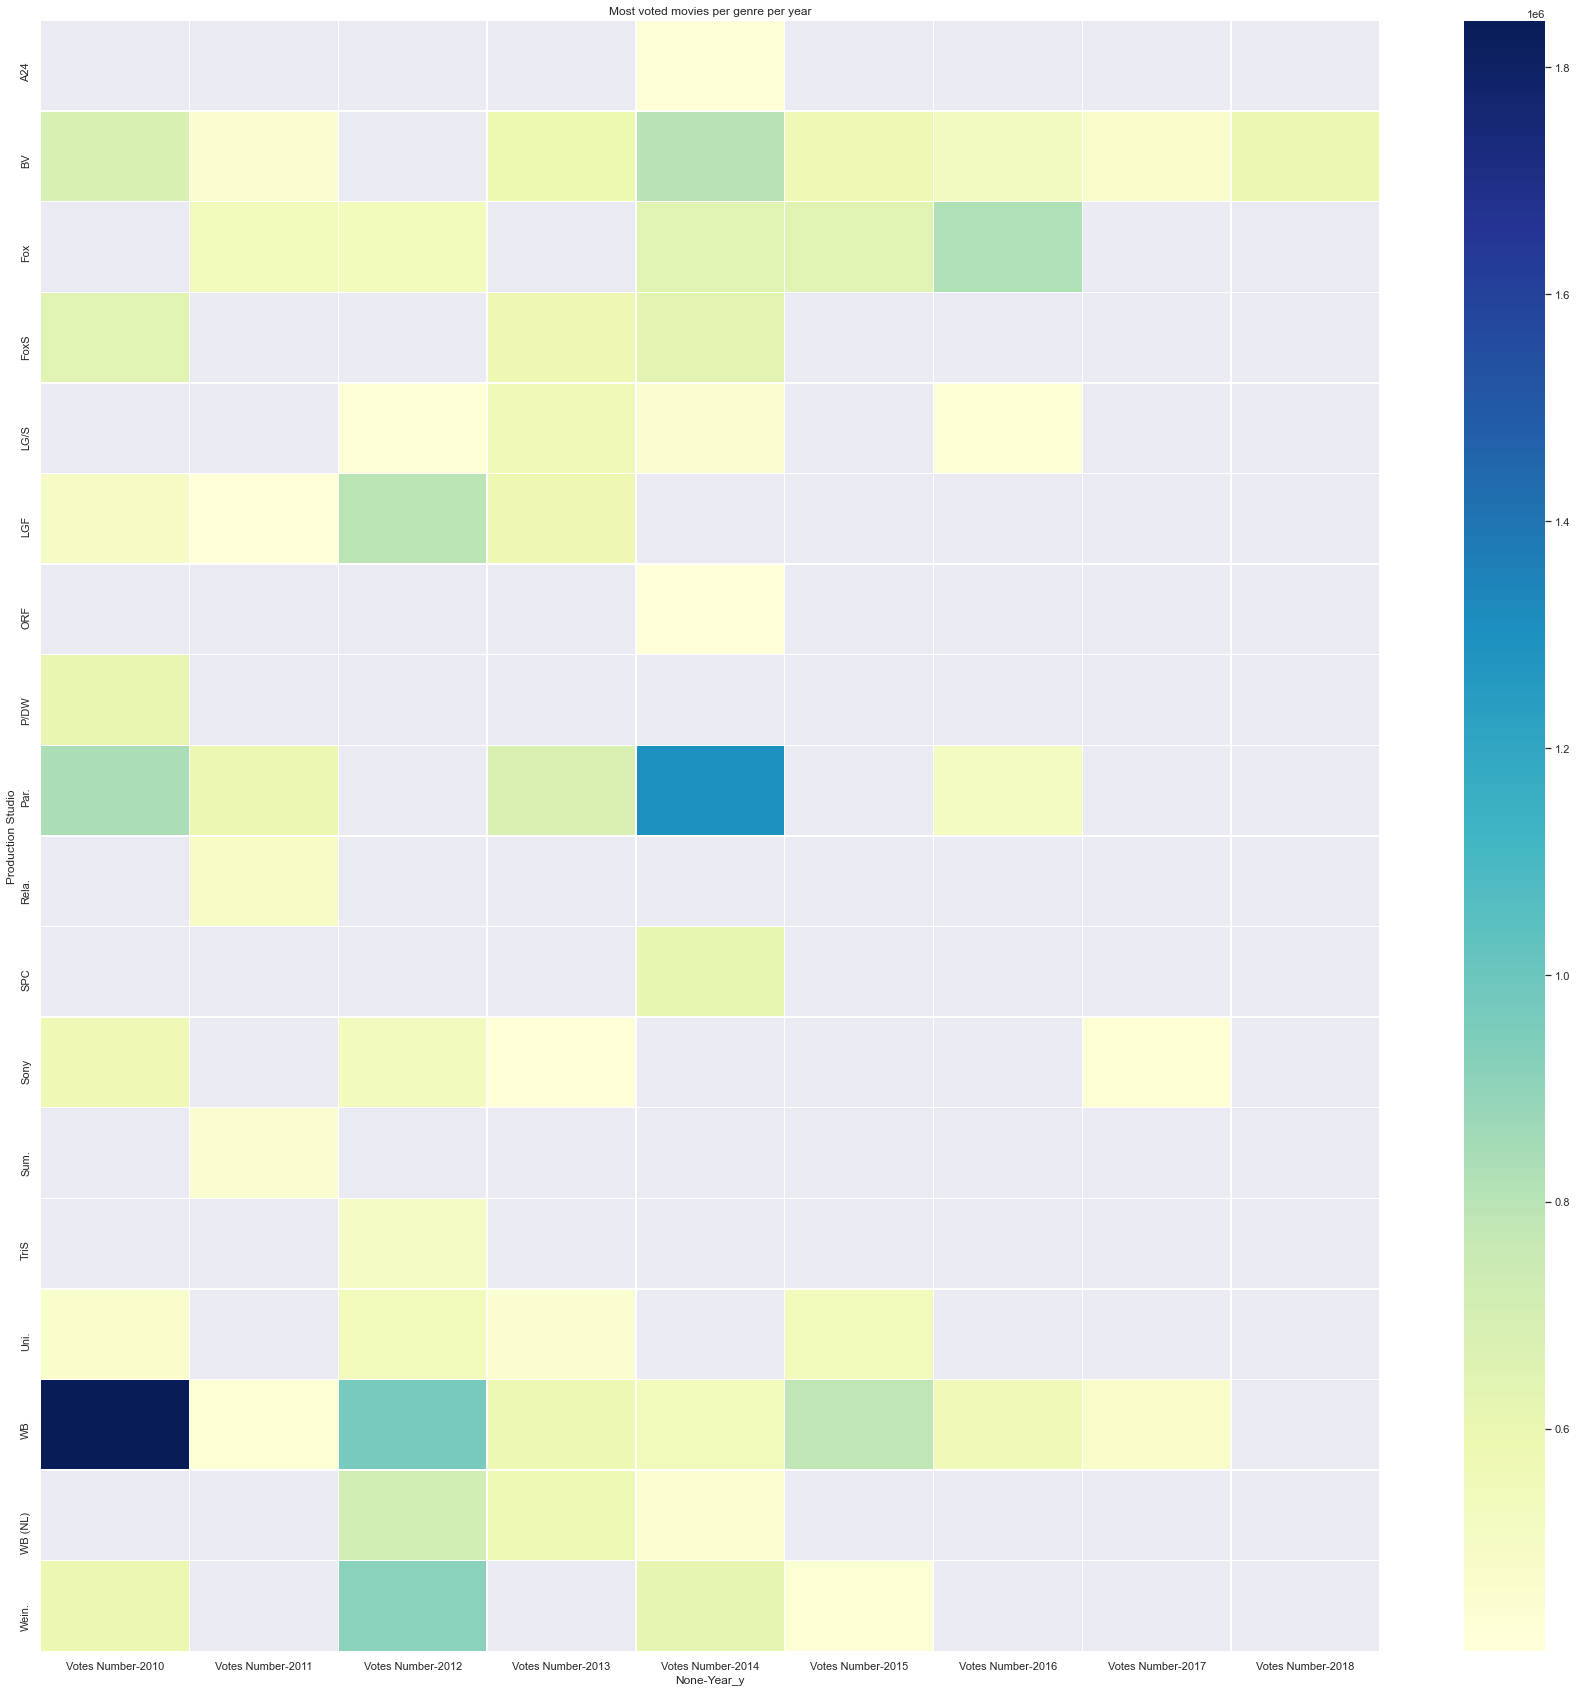

In [134]:
ig, ax = plt.subplots(figsize=(30,30)) 
ax.set_title('Most voted movies per genre per year')
sns.heatmap(prod_voted_pivot, linewidths=.5, cmap='YlGnBu');

Studios which produced the most voted movies:
- BV (Buena Vista)
- WB (Warner Bros)

In [129]:
#Production Studios which produced the movies with the highest average ratings

In [130]:
prod_rating = prod_mt.groupby(["Year_y", "Production Studio"])["Average Rating"].mean().reset_index()
prod_rating

,Year_y,Production Studio,Average Rating
0,2010,BV,8.300000
1,2010,FoxS,8.000000
2,2010,LGF,7.600000
3,2010,P/DW,8.100000
4,2010,Par.,7.550000
5,2010,Sony,7.700000
6,2010,Uni.,7.700000
7,2010,WB,8.800000
8,2010,Wein.,8.000000
9,2011,BV,6.600000


In [131]:
prod_rating_pivot = pd.pivot_table(prod_rating, values=["Average Rating"], index =["Production Studio"], columns=["Year_y"])
prod_rating_pivot

Average Rating                                           \
Year_y                      2010  2011      2012      2013      2014 2015   
Production Studio                                                           
A24                          NaN   NaN       NaN       NaN  7.700000  NaN   
BV                          8.30  6.60       NaN  7.200000  7.950000  7.6   
Fox                          NaN  7.65  7.450000       NaN  7.933333  8.0   
FoxS                        8.00   NaN       NaN  8.100000  8.100000  NaN   
LG/S                         NaN   NaN  8.000000  7.300000  7.400000  NaN   
LGF                         7.60  8.20  7.200000  7.500000       NaN  NaN   
ORF                          NaN   NaN       NaN       NaN  7.900000  NaN   
P/DW                        8.10   NaN       NaN       NaN       NaN  NaN   
Par.                        7.55  7.10       NaN  7.633333  8.600000  NaN   
Rela.                        NaN  7.40       NaN       NaN       NaN  NaN   
SPC                          NaN   NaN       NaN       NaN  8.500000  NaN   
Sony                        7.70   NaN  7.333333  7.200000       NaN  NaN   
Sum.                         NaN  7.50       NaN       NaN       NaN  NaN   
TriS                         NaN   NaN  7.400000       NaN       NaN  NaN   
Uni.                        7.70   NaN  6.900000  7.000000       NaN  7.0   
WB                          8.80  6.95  8.050000  7.450000  7.900000  8.1   
WB (NL)                      NaN   NaN  7.900000  7.800000  7.400000  NaN   
Wein.                       8.00   NaN  8.050000       NaN  8.000000  7.8   

                                        
Year_y             2016      2017 2018  
Production Studio                       
A24                 NaN       NaN  NaN  
BV                 7.70  7.566667  7.9  
Fox                8.00       NaN  NaN  
FoxS                NaN       NaN  NaN  
LG/S               8.00       NaN  NaN  
LGF                 NaN       NaN  NaN  
ORF                 NaN       NaN  NaN  
P/DW                NaN       NaN  NaN  
Par.               7.90       NaN  NaN  
Rela.               NaN       NaN  NaN  
SPC                 NaN       NaN  NaN  
Sony                NaN  7.500000  NaN  
Sum.                NaN       NaN  NaN  
TriS                NaN       NaN  NaN  
Uni.                NaN       NaN  NaN  
WB                 6.25  7.700000  NaN  
WB (NL)             NaN       NaN  NaN  
Wein.               NaN       NaN  NaN

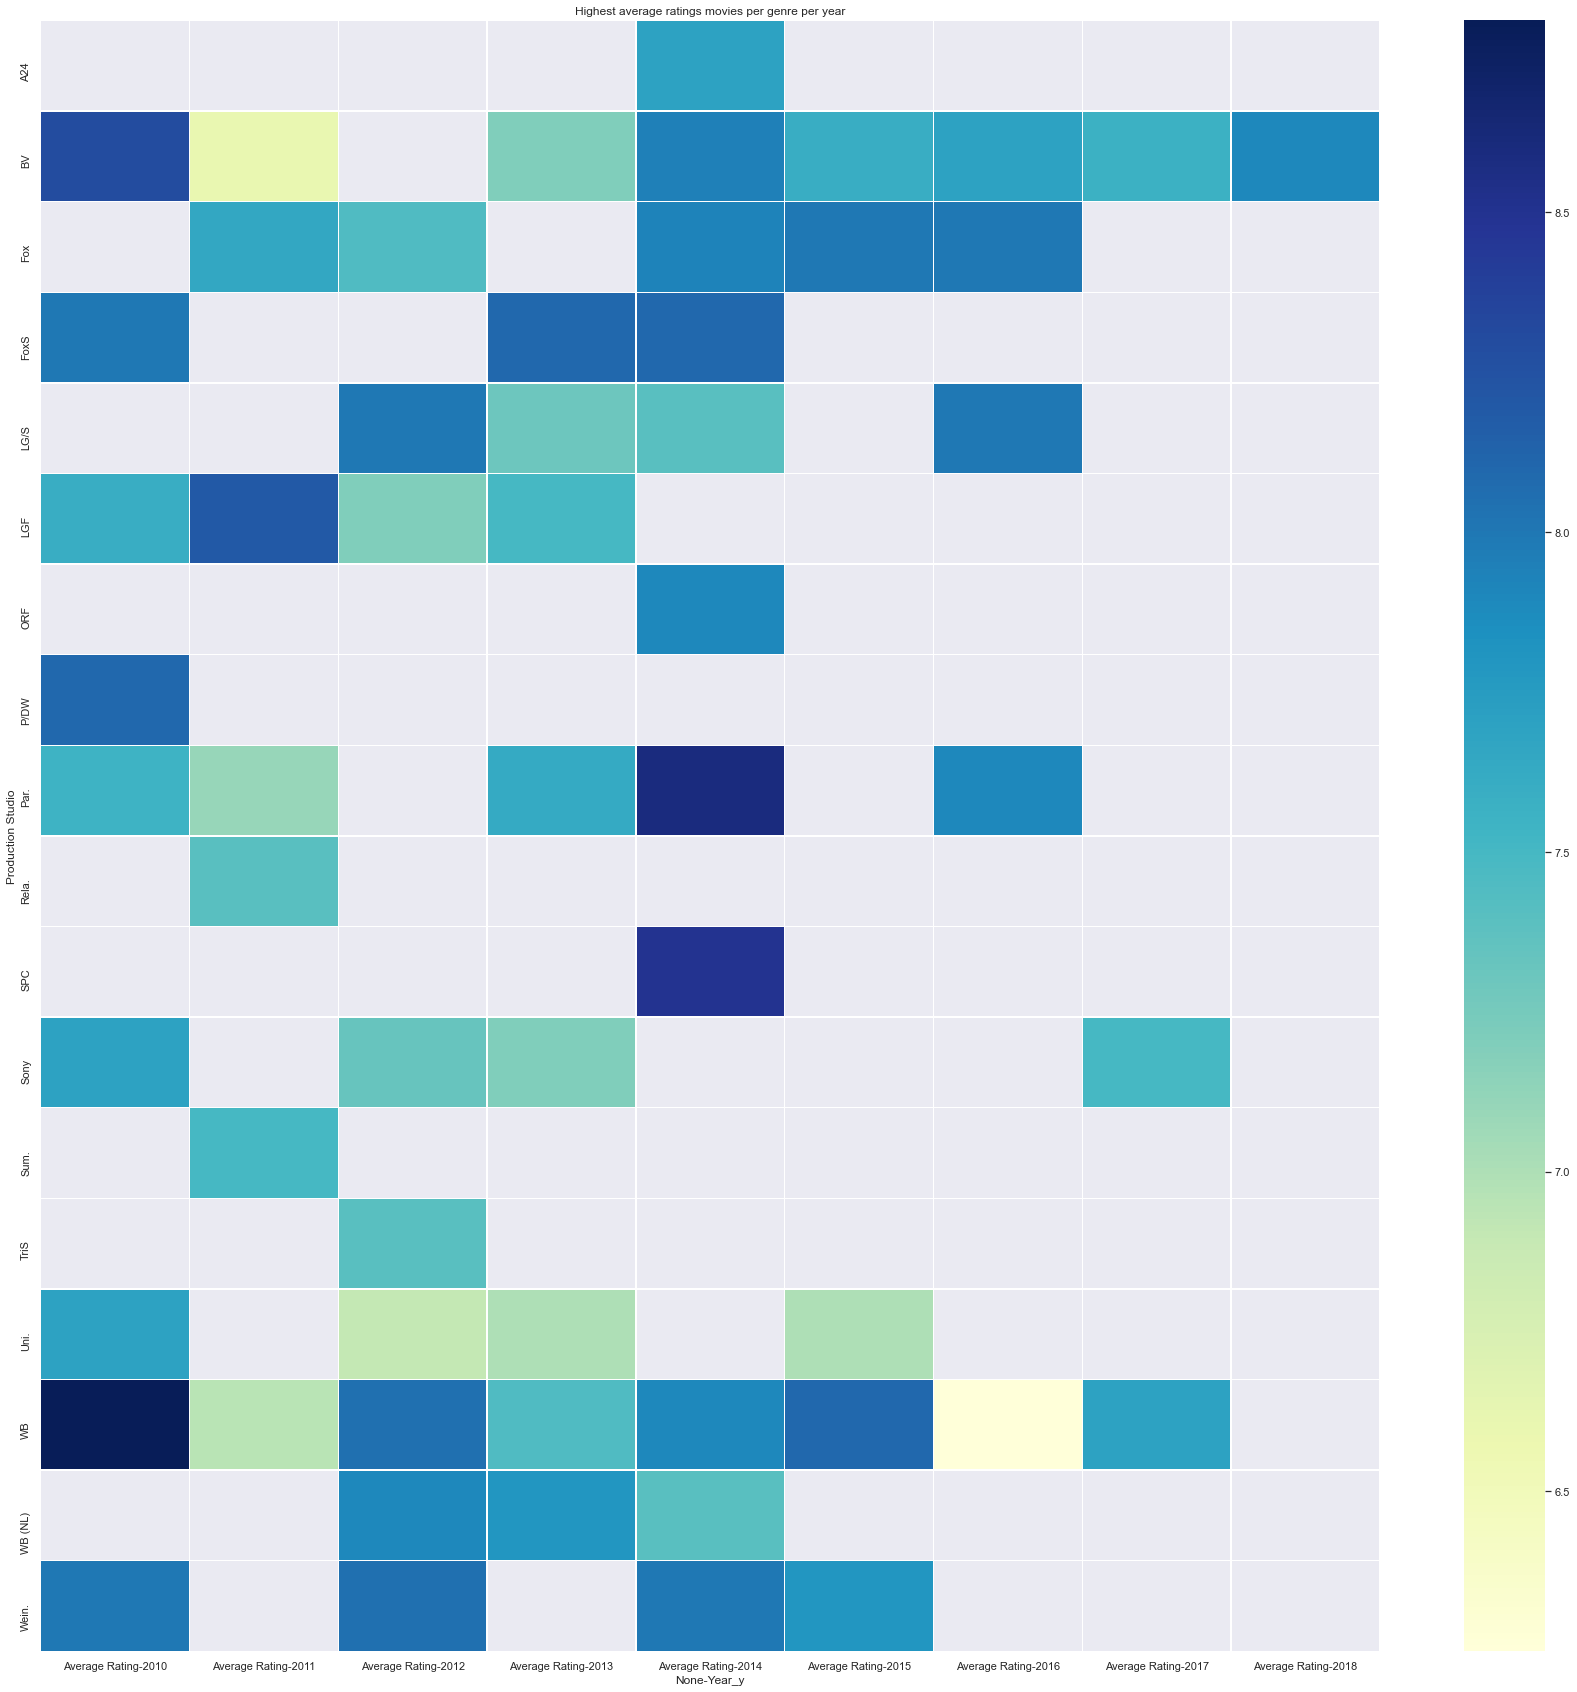

In [135]:
ig, ax = plt.subplots(figsize=(30,30)) 
ax.set_title('Highest average ratings movies per genre per year')
sns.heatmap(prod_rating_pivot, linewidths=.5, cmap='YlGnBu');

Production studios which created the highest average rated movies are:
- BV
- WB

# Conclusions

Which genres are doing better at the box office?

According to the given data, Sci fi, Action, Adventure and Animation are the most remunerative genres at the box office both for domestic and foreign markets.
There is a small correlation between box office gross, average ratings and votes number. 
Most voted movies belong to the following genres:Biography, Documentary, Music, News.
As for the highest average rated movies they belong to Sci fi, Aeventure, Fantasy and Action.
Given the fact that correlation is not causation, and several other variables should be considered, further investigations are advised.

## Further Findings
The most productive studios are Universal, Fox, Warner Bros, Sony, BV (Buena Vista) while those who earn the most are BV (Buena Vista), Focus and Warner Bros